In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [4]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, 750)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [5]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511),4)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(4):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(4 - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        print(number_codes)
        break

1
[[1, 1, 1, 1], [0, 1, 1, 1], [1, 1, 0, 0], [0, 0, 1, 0], [0, 1, 0, 1], [0, 0, 0, 0], [1, 1, 1, 0], [0, 0, 1, 1], [1, 0, 0, 1], [0, 0, 0, 1]]


In [6]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:642
number of class2:975

 ****** Running generation 0 ****** 

Population's average fitness: 0.53099 stdev: 0.09088
Best fitness: 0.71614 - size: (2, 13) - species 6 - id 117
Average adjusted fitness: 0.205
Mean genetic distance 2.853, standard deviation 0.448
Population of 201 members in 25 species
Total extinctions: 0
Generation time: 11.866 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55773 stdev: 0.09340
Best fitness: 0.73098 - size: (3, 14) - species 9 - id 218
Average adjusted fitness: 0.250
Mean genetic distance 2.952, standard deviation 0.462
Population of 199 members in 27 species
Total extinctions: 0
Generation time: 12.247 sec (12.056 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57382 stdev: 0.09829
Best fitness: 0.73098 - size: (3, 14) - species 9 - id 218
Average adjusted fitness: 0.316
Mean genetic distance 2.942, standard deviation 0.492
Population of 197 members in 28 species
Total extinc

Population's average fitness: 0.64200 stdev: 0.10586
Best fitness: 0.82251 - size: (7, 24) - species 14 - id 2941
Average adjusted fitness: 0.273
Mean genetic distance 3.135, standard deviation 0.498
Population of 200 members in 24 species
Total extinctions: 0
Generation time: 21.973 sec (20.312 average)

 ****** Running generation 25 ****** 

Population's average fitness: 0.64280 stdev: 0.10386
Best fitness: 0.82251 - size: (7, 24) - species 14 - id 2941
Average adjusted fitness: 0.263
Mean genetic distance 3.144, standard deviation 0.508
Population of 193 members in 23 species
Total extinctions: 0
Generation time: 19.395 sec (19.771 average)

 ****** Running generation 26 ****** 

Population's average fitness: 0.63606 stdev: 0.11032
Best fitness: 0.82251 - size: (7, 24) - species 14 - id 2941
Average adjusted fitness: 0.291
Mean genetic distance 3.144, standard deviation 0.517
Population of 204 members in 22 species
Total extinctions: 0
Generation time: 18.981 sec (19.449 average)

 

Population's average fitness: 0.67058 stdev: 0.09701
Best fitness: 0.85776 - size: (11, 35) - species 42 - id 7363
Average adjusted fitness: 0.270
Mean genetic distance 3.160, standard deviation 0.581
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 22.096 sec (22.792 average)

 ****** Running generation 49 ****** 

Population's average fitness: 0.67456 stdev: 0.09382
Best fitness: 0.85776 - size: (11, 35) - species 42 - id 7363
Average adjusted fitness: 0.274
Mean genetic distance 3.154, standard deviation 0.573
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 22.074 sec (22.929 average)

 ****** Running generation 50 ****** 

Population's average fitness: 0.65679 stdev: 0.11341
Best fitness: 0.85776 - size: (11, 35) - species 42 - id 7363
Average adjusted fitness: 0.336
Mean genetic distance 3.158, standard deviation 0.554
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 21.771 sec (23.028 average)

Population's average fitness: 0.67216 stdev: 0.10504
Best fitness: 0.86580 - size: (14, 39) - species 39 - id 11038
Average adjusted fitness: 0.268
Mean genetic distance 3.122, standard deviation 0.563
Population of 202 members in 19 species
Total extinctions: 0
Generation time: 23.559 sec (23.811 average)

 ****** Running generation 73 ****** 

Population's average fitness: 0.67608 stdev: 0.10463
Best fitness: 0.87013 - size: (11, 34) - species 14 - id 11705
Average adjusted fitness: 0.292
Mean genetic distance 3.135, standard deviation 0.582
Population of 200 members in 19 species
Total extinctions: 0
Generation time: 23.497 sec (23.803 average)

 ****** Running generation 74 ****** 

Population's average fitness: 0.67877 stdev: 0.11202
Best fitness: 0.87013 - size: (11, 34) - species 14 - id 11705
Average adjusted fitness: 0.348
Mean genetic distance 3.155, standard deviation 0.591
Population of 197 members in 18 species
Total extinctions: 0
Generation time: 23.747 sec (23.848 avera

Population's average fitness: 0.67156 stdev: 0.10730
Best fitness: 0.87013 - size: (11, 34) - species 64 - id 11705
Average adjusted fitness: 0.261
Mean genetic distance 3.352, standard deviation 0.619
Population of 195 members in 15 species
Total extinctions: 0
Generation time: 27.062 sec (27.603 average)

 ****** Running generation 97 ****** 

Population's average fitness: 0.65608 stdev: 0.10416
Best fitness: 0.87013 - size: (11, 34) - species 64 - id 11705
Average adjusted fitness: 0.305
Mean genetic distance 3.348, standard deviation 0.629
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 26.994 sec (27.833 average)

 ****** Running generation 98 ****** 

Population's average fitness: 0.67649 stdev: 0.10400
Best fitness: 0.87013 - size: (11, 34) - species 64 - id 11705
Average adjusted fitness: 0.272
Mean genetic distance 3.348, standard deviation 0.616
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 28.208 sec (27.685 avera

Population's average fitness: 0.66976 stdev: 0.12246
Best fitness: 0.87322 - size: (12, 37) - species 64 - id 16579
Average adjusted fitness: 0.286
Mean genetic distance 3.269, standard deviation 0.587
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 35.983 sec (34.706 average)

 ****** Running generation 121 ****** 

Population's average fitness: 0.67168 stdev: 0.11873
Best fitness: 0.87322 - size: (12, 37) - species 64 - id 16579
Average adjusted fitness: 0.288
Mean genetic distance 3.284, standard deviation 0.585
Population of 203 members in 20 species
Total extinctions: 0
Generation time: 34.646 sec (34.614 average)

 ****** Running generation 122 ****** 

Population's average fitness: 0.67408 stdev: 0.11316
Best fitness: 0.87322 - size: (12, 37) - species 64 - id 16579
Average adjusted fitness: 0.281
Mean genetic distance 3.294, standard deviation 0.577
Population of 196 members in 19 species
Total extinctions: 0
Generation time: 35.299 sec (34.481 ave

Population's average fitness: 0.69217 stdev: 0.10063
Best fitness: 0.87322 - size: (12, 37) - species 64 - id 16579
Average adjusted fitness: 0.273
Mean genetic distance 3.134, standard deviation 0.668
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 34.284 sec (36.814 average)

 ****** Running generation 145 ****** 

Population's average fitness: 0.68821 stdev: 0.10708
Best fitness: 0.87322 - size: (12, 37) - species 64 - id 16579
Average adjusted fitness: 0.378
Mean genetic distance 3.064, standard deviation 0.661
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 34.928 sec (36.303 average)

 ****** Running generation 146 ****** 

Population's average fitness: 0.69724 stdev: 0.11079
Best fitness: 0.87322 - size: (12, 37) - species 64 - id 16579
Average adjusted fitness: 0.350
Mean genetic distance 3.072, standard deviation 0.655
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 32.587 sec (35.636 averag

Population's average fitness: 0.69327 stdev: 0.11025
Best fitness: 0.87322 - size: (12, 37) - species 64 - id 16579
Average adjusted fitness: 0.357
Mean genetic distance 2.815, standard deviation 0.477
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 41.529 sec (37.539 average)

 ****** Running generation 169 ****** 

Population's average fitness: 0.69587 stdev: 0.11652
Best fitness: 0.87322 - size: (12, 37) - species 64 - id 16579
Average adjusted fitness: 0.387
Mean genetic distance 2.823, standard deviation 0.458
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 37.783 sec (37.668 average)

 ****** Running generation 170 ****** 

Population's average fitness: 0.69700 stdev: 0.11564
Best fitness: 0.87322 - size: (12, 37) - species 64 - id 16579
Average adjusted fitness: 0.458
Mean genetic distance 2.832, standard deviation 0.453
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 48.438 sec (38.634 ave

Population's average fitness: 0.69604 stdev: 0.11720
Best fitness: 0.87570 - size: (12, 36) - species 64 - id 31154
Average adjusted fitness: 0.292
Mean genetic distance 2.912, standard deviation 0.470
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 53.967 sec (63.003 average)

 ****** Running generation 193 ****** 

Population's average fitness: 0.69620 stdev: 0.10847
Best fitness: 0.87570 - size: (12, 36) - species 64 - id 31154
Average adjusted fitness: 0.327
Mean genetic distance 2.893, standard deviation 0.469
Population of 203 members in 15 species
Total extinctions: 0
Generation time: 43.071 sec (63.509 average)

 ****** Running generation 194 ****** 

Population's average fitness: 0.68866 stdev: 0.12592
Best fitness: 0.87570 - size: (12, 36) - species 64 - id 31154
Average adjusted fitness: 0.455
Mean genetic distance 2.902, standard deviation 0.471
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 43.361 sec (64.096 ave

Population's average fitness: 0.67810 stdev: 0.11408
Best fitness: 0.87570 - size: (12, 36) - species 64 - id 31154
Average adjusted fitness: 0.355
Mean genetic distance 2.896, standard deviation 0.495
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 36.824 sec (36.726 average)

 ****** Running generation 217 ****** 

Population's average fitness: 0.68317 stdev: 0.12090
Best fitness: 0.87570 - size: (12, 36) - species 64 - id 31154
Average adjusted fitness: 0.432
Mean genetic distance 2.903, standard deviation 0.500
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 37.567 sec (36.820 average)

 ****** Running generation 218 ****** 

Population's average fitness: 0.67303 stdev: 0.12040
Best fitness: 0.87570 - size: (12, 36) - species 64 - id 31154
Average adjusted fitness: 0.281
Mean genetic distance 2.919, standard deviation 0.477
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 39.795 sec (37.120 ave

Population's average fitness: 0.69912 stdev: 0.11815
Best fitness: 0.87570 - size: (12, 36) - species 64 - id 31154
Average adjusted fitness: 0.291
Mean genetic distance 2.862, standard deviation 0.522
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 43.206 sec (42.066 average)

 ****** Running generation 241 ****** 

Population's average fitness: 0.71285 stdev: 0.10526
Best fitness: 0.87570 - size: (12, 36) - species 64 - id 31154
Average adjusted fitness: 0.314
Mean genetic distance 2.851, standard deviation 0.532
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 41.023 sec (42.095 average)

 ****** Running generation 242 ****** 

Population's average fitness: 0.70927 stdev: 0.11401
Best fitness: 0.87570 - size: (12, 36) - species 64 - id 31154
Average adjusted fitness: 0.310
Mean genetic distance 2.854, standard deviation 0.540
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 41.754 sec (42.116 ave

Population's average fitness: 0.67756 stdev: 0.11797
Best fitness: 0.87631 - size: (32, 81) - species 107 - id 43237
Average adjusted fitness: 0.298
Mean genetic distance 2.732, standard deviation 0.432
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 40.075 sec (40.766 average)

 ****** Running generation 265 ****** 

Population's average fitness: 0.68401 stdev: 0.11914
Best fitness: 0.87631 - size: (32, 81) - species 107 - id 43237
Average adjusted fitness: 0.300
Mean genetic distance 2.756, standard deviation 0.424
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 38.784 sec (40.617 average)

 ****** Running generation 266 ****** 

Population's average fitness: 0.68988 stdev: 0.11470
Best fitness: 0.87631 - size: (32, 81) - species 107 - id 43237
Average adjusted fitness: 0.297
Mean genetic distance 2.749, standard deviation 0.425
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 39.484 sec (40.663 

Population's average fitness: 0.67188 stdev: 0.12191
Best fitness: 0.88064 - size: (33, 80) - species 107 - id 48410
Average adjusted fitness: 0.360
Mean genetic distance 2.678, standard deviation 0.409
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 42.088 sec (42.223 average)

 ****** Running generation 289 ****** 

Population's average fitness: 0.66903 stdev: 0.12375
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.265
Mean genetic distance 2.786, standard deviation 0.430
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 41.015 sec (42.071 average)

 ****** Running generation 290 ****** 

Population's average fitness: 0.67128 stdev: 0.12142
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.368
Mean genetic distance 2.783, standard deviation 0.418
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 43.271 sec (42.248 a

Mean genetic distance 2.796, standard deviation 0.432
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 41.786 sec (43.367 average)

 ****** Running generation 312 ****** 

Population's average fitness: 0.68523 stdev: 0.12113
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.324
Mean genetic distance 2.799, standard deviation 0.423
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 44.153 sec (43.459 average)

 ****** Running generation 313 ****** 

Population's average fitness: 0.69219 stdev: 0.12794
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.343
Mean genetic distance 2.793, standard deviation 0.420
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 46.370 sec (43.694 average)

 ****** Running generation 314 ****** 

Population's average fitness: 0.68170 stdev: 0.13394
Best fitness: 0.88064 - size: (33, 80) - speci

Population's average fitness: 0.68825 stdev: 0.12458
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.448
Mean genetic distance 2.822, standard deviation 0.441
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 39.883 sec (39.594 average)

 ****** Running generation 336 ****** 

Population's average fitness: 0.69286 stdev: 0.12751
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.325
Mean genetic distance 2.818, standard deviation 0.459
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 36.036 sec (39.204 average)

 ****** Running generation 337 ****** 

Population's average fitness: 0.68081 stdev: 0.13204
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.284
Mean genetic distance 2.833, standard deviation 0.494
Population of 203 members in 14 species
Total extinctions: 0
Generation time: 36.252 sec (38.483 

Mean genetic distance 2.771, standard deviation 0.446
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 33.838 sec (34.429 average)

 ****** Running generation 359 ****** 

Population's average fitness: 0.66352 stdev: 0.12198
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.371
Mean genetic distance 2.794, standard deviation 0.435
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 33.967 sec (34.387 average)

 ****** Running generation 360 ****** 

Population's average fitness: 0.66673 stdev: 0.11972
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.318
Mean genetic distance 2.790, standard deviation 0.458
Population of 196 members in 12 species
Total extinctions: 0
Generation time: 32.846 sec (34.280 average)

 ****** Running generation 361 ****** 

Population's average fitness: 0.67916 stdev: 0.11435
Best fitness: 0.88064 - size: (33, 80) - speci

Population's average fitness: 0.68605 stdev: 0.10821
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.350
Mean genetic distance 2.909, standard deviation 0.492
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 32.849 sec (33.140 average)

 ****** Running generation 383 ****** 

Population's average fitness: 0.68756 stdev: 0.10641
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.301
Mean genetic distance 2.938, standard deviation 0.479
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 34.341 sec (33.347 average)

 ****** Running generation 384 ****** 

Population's average fitness: 0.67581 stdev: 0.11368
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.330
Mean genetic distance 2.938, standard deviation 0.492
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 34.326 sec (33.667 

Mean genetic distance 2.919, standard deviation 0.506
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 37.214 sec (36.974 average)

 ****** Running generation 406 ****** 

Population's average fitness: 0.70012 stdev: 0.13018
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.362
Mean genetic distance 2.903, standard deviation 0.518
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 35.955 sec (36.821 average)

 ****** Running generation 407 ****** 

Population's average fitness: 0.70211 stdev: 0.11537
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.306
Mean genetic distance 2.917, standard deviation 0.516
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 36.662 sec (36.911 average)

 ****** Running generation 408 ****** 

Population's average fitness: 0.69430 stdev: 0.12953
Best fitness: 0.88064 - size: (33, 80) - speci

Population's average fitness: 0.67964 stdev: 0.12357
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.376
Mean genetic distance 3.007, standard deviation 0.507
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 39.796 sec (40.812 average)

 ****** Running generation 430 ****** 

Population's average fitness: 0.68778 stdev: 0.12074
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.312
Mean genetic distance 2.984, standard deviation 0.504
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 35.697 sec (40.145 average)

 ****** Running generation 431 ****** 

Population's average fitness: 0.69490 stdev: 0.12522
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.406
Mean genetic distance 2.984, standard deviation 0.507
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 36.752 sec (39.977 

Mean genetic distance 3.045, standard deviation 0.582
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 43.843 sec (39.924 average)

 ****** Running generation 453 ****** 

Population's average fitness: 0.69018 stdev: 0.11875
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.383
Mean genetic distance 3.066, standard deviation 0.561
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 45.080 sec (40.293 average)

 ****** Running generation 454 ****** 

Population's average fitness: 0.69401 stdev: 0.11941
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.356
Mean genetic distance 3.051, standard deviation 0.574
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 42.355 sec (40.388 average)

 ****** Running generation 455 ****** 

Population's average fitness: 0.70827 stdev: 0.10608
Best fitness: 0.88064 - size: (33, 80) - speci

Population's average fitness: 0.69322 stdev: 0.11656
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.288
Mean genetic distance 3.078, standard deviation 0.654
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 37.056 sec (40.680 average)

 ****** Running generation 477 ****** 

Population's average fitness: 0.70285 stdev: 0.11116
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.305
Mean genetic distance 3.081, standard deviation 0.635
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 37.157 sec (40.495 average)

 ****** Running generation 478 ****** 

Population's average fitness: 0.69198 stdev: 0.12434
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.304
Mean genetic distance 3.096, standard deviation 0.633
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 37.973 sec (40.214 

Population's average fitness: 0.67252 stdev: 0.12464
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.315
Mean genetic distance 2.838, standard deviation 0.591
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 49.835 sec (53.349 average)

 ****** Running generation 501 ****** 

Population's average fitness: 0.66344 stdev: 0.12948
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.342
Mean genetic distance 2.846, standard deviation 0.576
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 52.189 sec (52.975 average)

 ****** Running generation 502 ****** 

Population's average fitness: 0.67944 stdev: 0.12680
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.321
Mean genetic distance 2.837, standard deviation 0.553
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 54.822 sec (52.961 

Mean genetic distance 2.814, standard deviation 0.450
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 48.598 sec (53.367 average)

 ****** Running generation 524 ****** 

Population's average fitness: 0.69023 stdev: 0.11781
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.293
Mean genetic distance 2.825, standard deviation 0.449
Population of 201 members in 15 species
Total extinctions: 0
Generation time: 55.512 sec (53.474 average)

 ****** Running generation 525 ****** 

Population's average fitness: 0.68285 stdev: 0.12539
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.357
Mean genetic distance 2.832, standard deviation 0.441
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 55.150 sec (53.969 average)

 ****** Running generation 526 ****** 

Population's average fitness: 0.69916 stdev: 0.11648
Best fitness: 0.88064 - size: (33, 80) - speci

Population's average fitness: 0.70440 stdev: 0.12070
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.395
Mean genetic distance 2.731, standard deviation 0.416
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 64.668 sec (65.237 average)

 ****** Running generation 548 ****** 

Population's average fitness: 0.69019 stdev: 0.12005
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.350
Mean genetic distance 2.727, standard deviation 0.414
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 75.507 sec (66.757 average)

 ****** Running generation 549 ****** 

Population's average fitness: 0.69630 stdev: 0.11977
Best fitness: 0.88064 - size: (33, 80) - species 129 - id 48410
Average adjusted fitness: 0.278
Mean genetic distance 2.731, standard deviation 0.423
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 84.693 sec (69.144 

Population's average fitness: 0.68254 stdev: 0.11890
Best fitness: 0.89116 - size: (34, 80) - species 129 - id 95580
Average adjusted fitness: 0.348
Mean genetic distance 2.749, standard deviation 0.405
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 65.227 sec (60.962 average)

 ****** Running generation 572 ****** 

Population's average fitness: 0.68352 stdev: 0.12043
Best fitness: 0.89116 - size: (34, 80) - species 129 - id 95580
Average adjusted fitness: 0.299
Mean genetic distance 2.747, standard deviation 0.390
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 53.976 sec (60.233 average)

 ****** Running generation 573 ****** 

Population's average fitness: 0.67679 stdev: 0.12423
Best fitness: 0.89116 - size: (34, 80) - species 129 - id 95580
Average adjusted fitness: 0.350
Mean genetic distance 2.760, standard deviation 0.403
Population of 201 members in 16 species
Total extinctions: 0
Generation time: 51.421 sec (59.678 

Mean genetic distance 2.830, standard deviation 0.435
Population of 199 members in 15 species
Total extinctions: 0
Generation time: 51.604 sec (55.696 average)

 ****** Running generation 595 ****** 

Population's average fitness: 0.67933 stdev: 0.12041
Best fitness: 0.89116 - size: (34, 80) - species 129 - id 95580
Average adjusted fitness: 0.275
Mean genetic distance 2.845, standard deviation 0.437
Population of 198 members in 15 species
Total extinctions: 0
Generation time: 60.829 sec (56.332 average)

 ****** Running generation 596 ****** 

Population's average fitness: 0.68324 stdev: 0.11922
Best fitness: 0.89116 - size: (34, 80) - species 129 - id 95580
Average adjusted fitness: 0.342
Mean genetic distance 2.850, standard deviation 0.440
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 55.234 sec (56.496 average)

 ****** Running generation 597 ****** 

Population's average fitness: 0.69020 stdev: 0.11957
Best fitness: 0.89116 - size: (34, 80) - speci

Population's average fitness: 0.70065 stdev: 0.11474
Best fitness: 0.89116 - size: (34, 80) - species 129 - id 95580
Average adjusted fitness: 0.304
Mean genetic distance 2.925, standard deviation 0.524
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 45.533 sec (48.112 average)

 ****** Running generation 619 ****** 

Population's average fitness: 0.69243 stdev: 0.11569
Best fitness: 0.89116 - size: (34, 80) - species 129 - id 95580
Average adjusted fitness: 0.357
Mean genetic distance 2.923, standard deviation 0.550
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 43.653 sec (47.798 average)

 ****** Running generation 620 ****** 

Population's average fitness: 0.68838 stdev: 0.12142
Best fitness: 0.89116 - size: (34, 80) - species 129 - id 95580
Average adjusted fitness: 0.336
Mean genetic distance 2.928, standard deviation 0.538
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 49.976 sec (48.240 

Population's average fitness: 0.68386 stdev: 0.11840
Best fitness: 0.89116 - size: (34, 80) - species 129 - id 95580
Average adjusted fitness: 0.352
Mean genetic distance 2.907, standard deviation 0.500
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 57.112 sec (49.185 average)

 ****** Running generation 643 ****** 

Population's average fitness: 0.68344 stdev: 0.11273
Best fitness: 0.89116 - size: (34, 80) - species 129 - id 95580
Average adjusted fitness: 0.281
Mean genetic distance 2.895, standard deviation 0.479
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 51.888 sec (50.329 average)

 ****** Running generation 644 ****** 

Population's average fitness: 0.67818 stdev: 0.11826
Best fitness: 0.89116 - size: (34, 80) - species 129 - id 95580
Average adjusted fitness: 0.358
Mean genetic distance 2.905, standard deviation 0.470
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 60.211 sec (52.172 

Mean genetic distance 2.894, standard deviation 0.535
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 57.095 sec (56.754 average)

 ****** Running generation 666 ****** 

Population's average fitness: 0.68393 stdev: 0.12216
Best fitness: 0.89116 - size: (34, 80) - species 129 - id 95580
Average adjusted fitness: 0.424
Mean genetic distance 2.929, standard deviation 0.546
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 56.984 sec (57.038 average)

 ****** Running generation 667 ****** 

Population's average fitness: 0.69370 stdev: 0.12067
Best fitness: 0.89116 - size: (34, 80) - species 129 - id 95580
Average adjusted fitness: 0.343
Mean genetic distance 2.924, standard deviation 0.551
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 52.334 sec (56.906 average)

 ****** Running generation 668 ****** 

Population's average fitness: 0.68477 stdev: 0.11938
Best fitness: 0.89116 - size: (34, 80) - speci

Population's average fitness: 0.68036 stdev: 0.11962
Best fitness: 0.89116 - size: (34, 80) - species 266 - id 95580
Average adjusted fitness: 0.346
Mean genetic distance 2.985, standard deviation 0.546
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 56.856 sec (56.708 average)

 ****** Running generation 690 ****** 

Population's average fitness: 0.68650 stdev: 0.12060
Best fitness: 0.89116 - size: (34, 80) - species 266 - id 95580
Average adjusted fitness: 0.388
Mean genetic distance 2.994, standard deviation 0.546
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 53.873 sec (56.419 average)

 ****** Running generation 691 ****** 

Population's average fitness: 0.68962 stdev: 0.11237
Best fitness: 0.89116 - size: (34, 80) - species 266 - id 95580
Average adjusted fitness: 0.347
Mean genetic distance 2.981, standard deviation 0.579
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 54.946 sec (55.970 

Mean genetic distance 3.176, standard deviation 0.637
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 50.475 sec (51.927 average)

 ****** Running generation 713 ****** 

Population's average fitness: 0.69749 stdev: 0.11854
Best fitness: 0.89116 - size: (34, 80) - species 266 - id 95580
Average adjusted fitness: 0.304
Mean genetic distance 3.175, standard deviation 0.621
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 48.793 sec (51.158 average)

 ****** Running generation 714 ****** 

Population's average fitness: 0.69495 stdev: 0.11746
Best fitness: 0.89116 - size: (34, 80) - species 266 - id 95580
Average adjusted fitness: 0.371
Mean genetic distance 3.145, standard deviation 0.614
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 52.588 sec (50.984 average)

 ****** Running generation 715 ****** 

Population's average fitness: 0.69752 stdev: 0.11386
Best fitness: 0.89116 - size: (34, 80) - speci

Population's average fitness: 0.66834 stdev: 0.12295
Best fitness: 0.89116 - size: (34, 80) - species 266 - id 95580
Average adjusted fitness: 0.272
Mean genetic distance 3.101, standard deviation 0.699
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 54.075 sec (52.906 average)

 ****** Running generation 737 ****** 

Population's average fitness: 0.67682 stdev: 0.11715
Best fitness: 0.89116 - size: (34, 80) - species 266 - id 95580
Average adjusted fitness: 0.316
Mean genetic distance 3.117, standard deviation 0.726
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 55.747 sec (53.254 average)

 ****** Running generation 738 ****** 

Population's average fitness: 0.68111 stdev: 0.11050
Best fitness: 0.89116 - size: (34, 80) - species 266 - id 95580
Average adjusted fitness: 0.285
Mean genetic distance 3.128, standard deviation 0.694
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 54.232 sec (53.712 ave

Population's average fitness: 0.62641 stdev: 0.08933
Best fitness: 0.83612 - size: (6, 23) - species 27 - id 1422
Average adjusted fitness: 0.267
Mean genetic distance 3.153, standard deviation 0.459
Population of 198 members in 43 species
Total extinctions: 0
Generation time: 21.841 sec (18.814 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63043 stdev: 0.09040
Best fitness: 0.83612 - size: (6, 23) - species 27 - id 1422
Average adjusted fitness: 0.275
Mean genetic distance 3.145, standard deviation 0.457
Population of 200 members in 43 species
Total extinctions: 0
Generation time: 19.348 sec (19.040 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.62962 stdev: 0.09694
Best fitness: 0.83612 - size: (6, 23) - species 27 - id 1422
Average adjusted fitness: 0.224
Mean genetic distance 3.156, standard deviation 0.463
Population of 200 members in 44 species
Total extinctions: 0
Generation time: 19.745 sec (19.267 average)

 

Population's average fitness: 0.67068 stdev: 0.10079
Best fitness: 0.85281 - size: (6, 22) - species 50 - id 3287
Average adjusted fitness: 0.322
Mean genetic distance 3.287, standard deviation 0.483
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 22.804 sec (21.635 average)

 ****** Running generation 35 ****** 

Population's average fitness: 0.65383 stdev: 0.10433
Best fitness: 0.85281 - size: (6, 22) - species 50 - id 3287
Average adjusted fitness: 0.237
Mean genetic distance 3.290, standard deviation 0.482
Population of 194 members in 32 species
Total extinctions: 0
Generation time: 23.682 sec (21.782 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.66759 stdev: 0.10007
Best fitness: 0.85281 - size: (6, 22) - species 50 - id 3287
Average adjusted fitness: 0.264
Mean genetic distance 3.287, standard deviation 0.476
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 26.809 sec (22.407 average)

 

Population's average fitness: 0.65552 stdev: 0.10911
Best fitness: 0.88002 - size: (6, 23) - species 14 - id 5812
Average adjusted fitness: 0.188
Mean genetic distance 3.291, standard deviation 0.568
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 21.612 sec (23.995 average)

 ****** Running generation 59 ****** 

Population's average fitness: 0.65464 stdev: 0.11359
Best fitness: 0.88002 - size: (6, 23) - species 14 - id 5812
Average adjusted fitness: 0.326
Mean genetic distance 3.297, standard deviation 0.550
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 21.307 sec (23.760 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.65356 stdev: 0.11100
Best fitness: 0.88002 - size: (6, 23) - species 14 - id 5812
Average adjusted fitness: 0.277
Mean genetic distance 3.291, standard deviation 0.564
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 21.768 sec (23.748 average)

 

Population's average fitness: 0.64628 stdev: 0.10150
Best fitness: 0.88002 - size: (6, 23) - species 14 - id 5812
Average adjusted fitness: 0.286
Mean genetic distance 3.247, standard deviation 0.542
Population of 195 members in 18 species
Total extinctions: 0
Generation time: 26.717 sec (26.574 average)

 ****** Running generation 83 ****** 

Population's average fitness: 0.64756 stdev: 0.10254
Best fitness: 0.88002 - size: (6, 23) - species 14 - id 5812
Average adjusted fitness: 0.243
Mean genetic distance 3.267, standard deviation 0.530
Population of 198 members in 18 species
Total extinctions: 0
Generation time: 26.964 sec (26.628 average)

 ****** Running generation 84 ****** 

Population's average fitness: 0.64937 stdev: 0.10370
Best fitness: 0.88002 - size: (6, 23) - species 14 - id 5812
Average adjusted fitness: 0.232
Mean genetic distance 3.237, standard deviation 0.531
Population of 194 members in 19 species
Total extinctions: 0
Generation time: 26.200 sec (26.489 average)

 

Population's average fitness: 0.66282 stdev: 0.10019
Best fitness: 0.88002 - size: (6, 23) - species 14 - id 5812
Average adjusted fitness: 0.199
Mean genetic distance 3.198, standard deviation 0.622
Population of 205 members in 16 species
Total extinctions: 0
Generation time: 30.368 sec (29.668 average)

 ****** Running generation 107 ****** 

Population's average fitness: 0.66100 stdev: 0.10346
Best fitness: 0.88002 - size: (6, 23) - species 14 - id 5812
Average adjusted fitness: 0.316
Mean genetic distance 3.211, standard deviation 0.618
Population of 196 members in 16 species
Total extinctions: 0
Generation time: 27.589 sec (29.416 average)

 ****** Running generation 108 ****** 

Population's average fitness: 0.66621 stdev: 0.10592
Best fitness: 0.88002 - size: (6, 23) - species 14 - id 5812
Average adjusted fitness: 0.261
Mean genetic distance 3.217, standard deviation 0.601
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 33.140 sec (29.730 average)


Population's average fitness: 0.66912 stdev: 0.09904
Best fitness: 0.88002 - size: (6, 23) - species 14 - id 5812
Average adjusted fitness: 0.222
Mean genetic distance 3.025, standard deviation 0.623
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 27.936 sec (30.093 average)

 ****** Running generation 131 ****** 

Population's average fitness: 0.66315 stdev: 0.10415
Best fitness: 0.88002 - size: (6, 23) - species 14 - id 5812
Average adjusted fitness: 0.306
Mean genetic distance 3.040, standard deviation 0.618
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 27.359 sec (29.757 average)

 ****** Running generation 132 ****** 

Population's average fitness: 0.66784 stdev: 0.09733
Best fitness: 0.88002 - size: (6, 23) - species 14 - id 5812
Average adjusted fitness: 0.248
Mean genetic distance 3.056, standard deviation 0.618
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 28.377 sec (29.169 average)


Population's average fitness: 0.66905 stdev: 0.09993
Best fitness: 0.88621 - size: (7, 25) - species 14 - id 24081
Average adjusted fitness: 0.287
Mean genetic distance 2.855, standard deviation 0.537
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 29.344 sec (30.843 average)

 ****** Running generation 155 ****** 

Population's average fitness: 0.67432 stdev: 0.09980
Best fitness: 0.88621 - size: (7, 25) - species 14 - id 24081
Average adjusted fitness: 0.250
Mean genetic distance 2.875, standard deviation 0.519
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 31.011 sec (31.010 average)

 ****** Running generation 156 ****** 

Population's average fitness: 0.67317 stdev: 0.09514
Best fitness: 0.88621 - size: (7, 25) - species 14 - id 24081
Average adjusted fitness: 0.238
Mean genetic distance 2.891, standard deviation 0.522
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 31.555 sec (30.594 averag

Population's average fitness: 0.68537 stdev: 0.10895
Best fitness: 0.88621 - size: (7, 25) - species 92 - id 24081
Average adjusted fitness: 0.315
Mean genetic distance 2.765, standard deviation 0.520
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 33.933 sec (30.413 average)

 ****** Running generation 179 ****** 

Population's average fitness: 0.68777 stdev: 0.10810
Best fitness: 0.88621 - size: (7, 25) - species 92 - id 24081
Average adjusted fitness: 0.237
Mean genetic distance 2.773, standard deviation 0.485
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 33.229 sec (30.677 average)

 ****** Running generation 180 ****** 

Population's average fitness: 0.66939 stdev: 0.11461
Best fitness: 0.88621 - size: (7, 25) - species 92 - id 24081
Average adjusted fitness: 0.293
Mean genetic distance 2.772, standard deviation 0.470
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 29.612 sec (30.828 averag

Population's average fitness: 0.68146 stdev: 0.11833
Best fitness: 0.88621 - size: (7, 25) - species 92 - id 24081
Average adjusted fitness: 0.265
Mean genetic distance 2.908, standard deviation 0.533
Population of 194 members in 14 species
Total extinctions: 0
Generation time: 29.222 sec (31.553 average)

 ****** Running generation 203 ****** 

Population's average fitness: 0.68296 stdev: 0.11452
Best fitness: 0.88621 - size: (7, 25) - species 92 - id 24081
Average adjusted fitness: 0.274
Mean genetic distance 2.892, standard deviation 0.527
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 29.512 sec (31.381 average)

 ****** Running generation 204 ****** 

Population's average fitness: 0.67344 stdev: 0.12264
Best fitness: 0.88621 - size: (7, 25) - species 92 - id 24081
Average adjusted fitness: 0.350
Mean genetic distance 2.910, standard deviation 0.521
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 30.298 sec (31.112 averag

Population's average fitness: 0.68476 stdev: 0.11851
Best fitness: 0.88621 - size: (7, 25) - species 92 - id 24081
Average adjusted fitness: 0.184
Mean genetic distance 3.026, standard deviation 0.613
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 33.044 sec (33.294 average)

 ****** Running generation 227 ****** 

Population's average fitness: 0.69208 stdev: 0.11742
Best fitness: 0.88621 - size: (7, 25) - species 92 - id 24081
Average adjusted fitness: 0.293
Mean genetic distance 3.016, standard deviation 0.614
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 35.467 sec (33.641 average)

 ****** Running generation 228 ****** 

Population's average fitness: 0.68780 stdev: 0.11596
Best fitness: 0.88621 - size: (7, 25) - species 92 - id 24081
Average adjusted fitness: 0.245
Mean genetic distance 3.053, standard deviation 0.599
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 33.267 sec (33.680 averag

Population's average fitness: 0.66222 stdev: 0.11812
Best fitness: 0.89672 - size: (20, 46) - species 114 - id 40455
Average adjusted fitness: 0.268
Mean genetic distance 2.856, standard deviation 0.526
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 32.797 sec (33.362 average)

 ****** Running generation 251 ****** 

Population's average fitness: 0.67541 stdev: 0.12901
Best fitness: 0.89672 - size: (20, 46) - species 114 - id 40455
Average adjusted fitness: 0.441
Mean genetic distance 2.822, standard deviation 0.538
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 35.587 sec (33.801 average)

 ****** Running generation 252 ****** 

Population's average fitness: 0.64760 stdev: 0.12021
Best fitness: 0.89672 - size: (20, 46) - species 114 - id 40455
Average adjusted fitness: 0.235
Mean genetic distance 2.794, standard deviation 0.563
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 36.476 sec (34.126 

Mean genetic distance 2.830, standard deviation 0.562
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 34.288 sec (37.671 average)

 ****** Running generation 274 ****** 

Population's average fitness: 0.68260 stdev: 0.11965
Best fitness: 0.89672 - size: (20, 46) - species 127 - id 40455
Average adjusted fitness: 0.265
Mean genetic distance 2.848, standard deviation 0.579
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 33.968 sec (37.895 average)

 ****** Running generation 275 ****** 

Population's average fitness: 0.68933 stdev: 0.11995
Best fitness: 0.89672 - size: (20, 46) - species 127 - id 40455
Average adjusted fitness: 0.254
Mean genetic distance 2.828, standard deviation 0.585
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 33.575 sec (36.671 average)

 ****** Running generation 276 ****** 

Population's average fitness: 0.68592 stdev: 0.12026
Best fitness: 0.89672 - size: (20, 46) - specie

Population's average fitness: 0.65742 stdev: 0.13006
Best fitness: 0.89734 - size: (21, 49) - species 127 - id 48608
Average adjusted fitness: 0.382
Mean genetic distance 2.857, standard deviation 0.549
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 40.679 sec (36.759 average)

 ****** Running generation 298 ****** 

Population's average fitness: 0.68344 stdev: 0.12345
Best fitness: 0.89734 - size: (21, 49) - species 127 - id 48608
Average adjusted fitness: 0.414
Mean genetic distance 2.885, standard deviation 0.556
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 43.168 sec (37.541 average)

 ****** Running generation 299 ****** 

Population's average fitness: 0.68729 stdev: 0.12033
Best fitness: 0.89734 - size: (21, 49) - species 127 - id 48608
Average adjusted fitness: 0.281
Mean genetic distance 2.891, standard deviation 0.545
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 37.456 sec (37.780 

Mean genetic distance 3.002, standard deviation 0.631
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 36.975 sec (35.564 average)

 ****** Running generation 321 ****** 

Population's average fitness: 0.68002 stdev: 0.12553
Best fitness: 0.89734 - size: (21, 49) - species 127 - id 48608
Average adjusted fitness: 0.224
Mean genetic distance 3.000, standard deviation 0.629
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 36.473 sec (35.774 average)

 ****** Running generation 322 ****** 

Population's average fitness: 0.68288 stdev: 0.12579
Best fitness: 0.89734 - size: (21, 49) - species 127 - id 48608
Average adjusted fitness: 0.275
Mean genetic distance 2.980, standard deviation 0.624
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 35.434 sec (35.772 average)

 ****** Running generation 323 ****** 

Population's average fitness: 0.68549 stdev: 0.12222
Best fitness: 0.89734 - size: (21, 49) - speci

Population's average fitness: 0.66809 stdev: 0.12152
Best fitness: 0.89734 - size: (21, 49) - species 127 - id 48608
Average adjusted fitness: 0.204
Mean genetic distance 2.882, standard deviation 0.526
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 31.991 sec (32.619 average)

 ****** Running generation 345 ****** 

Population's average fitness: 0.67013 stdev: 0.12124
Best fitness: 0.89734 - size: (21, 49) - species 127 - id 48608
Average adjusted fitness: 0.282
Mean genetic distance 2.895, standard deviation 0.526
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 35.074 sec (32.564 average)

 ****** Running generation 346 ****** 

Population's average fitness: 0.66991 stdev: 0.12863
Best fitness: 0.89734 - size: (21, 49) - species 127 - id 48608
Average adjusted fitness: 0.382
Mean genetic distance 2.919, standard deviation 0.532
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 33.653 sec (32.416 

Mean genetic distance 2.973, standard deviation 0.586
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 35.125 sec (34.659 average)

 ****** Running generation 368 ****** 

Population's average fitness: 0.68443 stdev: 0.12181
Best fitness: 0.89734 - size: (21, 49) - species 127 - id 48608
Average adjusted fitness: 0.217
Mean genetic distance 2.964, standard deviation 0.596
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 36.234 sec (35.040 average)

 ****** Running generation 369 ****** 

Population's average fitness: 0.70251 stdev: 0.11935
Best fitness: 0.89734 - size: (21, 49) - species 127 - id 48608
Average adjusted fitness: 0.239
Mean genetic distance 2.960, standard deviation 0.573
Population of 203 members in 9 species
Total extinctions: 0
Generation time: 36.484 sec (35.321 average)

 ****** Running generation 370 ****** 

Population's average fitness: 0.69946 stdev: 0.11946
Best fitness: 0.89734 - size: (21, 49) - species 

Population's average fitness: 0.71454 stdev: 0.11384
Best fitness: 0.89734 - size: (21, 49) - species 127 - id 48608
Average adjusted fitness: 0.231
Mean genetic distance 2.871, standard deviation 0.455
Population of 202 members in 16 species
Total extinctions: 0
Generation time: 37.702 sec (37.834 average)

 ****** Running generation 392 ****** 

Population's average fitness: 0.71053 stdev: 0.12256
Best fitness: 0.89734 - size: (21, 49) - species 127 - id 48608
Average adjusted fitness: 0.210
Mean genetic distance 2.873, standard deviation 0.466
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 37.937 sec (37.917 average)

 ****** Running generation 393 ****** 

Population's average fitness: 0.69468 stdev: 0.12403
Best fitness: 0.89734 - size: (21, 49) - species 127 - id 48608
Average adjusted fitness: 0.291
Mean genetic distance 2.864, standard deviation 0.467
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 36.509 sec (37.803 

Mean genetic distance 2.883, standard deviation 0.431
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 36.383 sec (36.714 average)

 ****** Running generation 415 ****** 

Population's average fitness: 0.71702 stdev: 0.12201
Best fitness: 0.89920 - size: (20, 44) - species 127 - id 70354
Average adjusted fitness: 0.235
Mean genetic distance 2.850, standard deviation 0.435
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 36.713 sec (36.625 average)

 ****** Running generation 416 ****** 

Population's average fitness: 0.70606 stdev: 0.12172
Best fitness: 0.89920 - size: (20, 44) - species 127 - id 70354
Average adjusted fitness: 0.392
Mean genetic distance 2.857, standard deviation 0.435
Population of 205 members in 14 species
Total extinctions: 0
Generation time: 37.616 sec (36.537 average)

 ****** Running generation 417 ****** 

Population's average fitness: 0.70485 stdev: 0.12340
Best fitness: 0.89920 - size: (20, 44) - speci

Population's average fitness: 0.71538 stdev: 0.12255
Best fitness: 0.89920 - size: (20, 44) - species 178 - id 70354
Average adjusted fitness: 0.279
Mean genetic distance 2.832, standard deviation 0.450
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 36.364 sec (35.361 average)

 ****** Running generation 439 ****** 

Population's average fitness: 0.71879 stdev: 0.11605
Best fitness: 0.89920 - size: (20, 44) - species 178 - id 70354
Average adjusted fitness: 0.222
Mean genetic distance 2.808, standard deviation 0.466
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 36.723 sec (35.396 average)

 ****** Running generation 440 ****** 

Population's average fitness: 0.71933 stdev: 0.11205
Best fitness: 0.89920 - size: (20, 44) - species 178 - id 70354
Average adjusted fitness: 0.219
Mean genetic distance 2.822, standard deviation 0.456
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 38.751 sec (35.664 

Mean genetic distance 2.751, standard deviation 0.398
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 43.695 sec (40.838 average)

 ****** Running generation 462 ****** 

Population's average fitness: 0.69571 stdev: 0.10968
Best fitness: 0.89981 - size: (23, 60) - species 170 - id 76657
Average adjusted fitness: 0.196
Mean genetic distance 2.729, standard deviation 0.382
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 45.879 sec (41.453 average)

 ****** Running generation 463 ****** 

Population's average fitness: 0.69152 stdev: 0.11455
Best fitness: 0.89981 - size: (23, 60) - species 170 - id 76657
Average adjusted fitness: 0.214
Mean genetic distance 2.743, standard deviation 0.373
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 46.987 sec (42.171 average)

 ****** Running generation 464 ****** 

Population's average fitness: 0.68993 stdev: 0.10802
Best fitness: 0.89981 - size: (23, 60) - speci

Population's average fitness: 0.70988 stdev: 0.11624
Best fitness: 0.89981 - size: (23, 60) - species 170 - id 76657
Average adjusted fitness: 0.315
Mean genetic distance 2.622, standard deviation 0.417
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 46.668 sec (46.304 average)

 ****** Running generation 486 ****** 

Population's average fitness: 0.70741 stdev: 0.11907
Best fitness: 0.89981 - size: (23, 60) - species 170 - id 76657
Average adjusted fitness: 0.208
Mean genetic distance 2.639, standard deviation 0.383
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 44.908 sec (46.258 average)

 ****** Running generation 487 ****** 

Population's average fitness: 0.71914 stdev: 0.10999
Best fitness: 0.89981 - size: (23, 60) - species 170 - id 76657
Average adjusted fitness: 0.221
Mean genetic distance 2.677, standard deviation 0.374
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 44.399 sec (46.242 a

Mean genetic distance 2.756, standard deviation 0.435
Population of 196 members in 11 species
Total extinctions: 0
Generation time: 40.070 sec (41.732 average)

 ****** Running generation 509 ****** 

Population's average fitness: 0.70910 stdev: 0.11931
Best fitness: 0.90229 - size: (25, 62) - species 201 - id 86511
Average adjusted fitness: 0.208
Mean genetic distance 2.759, standard deviation 0.442
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 39.200 sec (41.644 average)

 ****** Running generation 510 ****** 

Population's average fitness: 0.72238 stdev: 0.11353
Best fitness: 0.90414 - size: (26, 62) - species 201 - id 87245
Average adjusted fitness: 0.221
Mean genetic distance 2.777, standard deviation 0.436
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 40.399 sec (41.640 average)

 ****** Running generation 511 ****** 

Population's average fitness: 0.72129 stdev: 0.11657
Best fitness: 0.90414 - size: (26, 62) - speci

Population's average fitness: 0.72501 stdev: 0.11734
Best fitness: 0.90847 - size: (27, 63) - species 201 - id 87949
Average adjusted fitness: 0.230
Mean genetic distance 2.736, standard deviation 0.394
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 36.849 sec (37.518 average)

 ****** Running generation 533 ****** 

Population's average fitness: 0.72930 stdev: 0.10623
Best fitness: 0.90847 - size: (27, 63) - species 201 - id 87949
Average adjusted fitness: 0.293
Mean genetic distance 2.720, standard deviation 0.384
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 37.616 sec (37.913 average)

 ****** Running generation 534 ****** 

Population's average fitness: 0.72831 stdev: 0.11655
Best fitness: 0.90847 - size: (27, 63) - species 201 - id 87949
Average adjusted fitness: 0.229
Mean genetic distance 2.726, standard deviation 0.397
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 37.545 sec (38.111 

Mean genetic distance 2.913, standard deviation 0.526
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 35.692 sec (36.656 average)

 ****** Running generation 556 ****** 

Population's average fitness: 0.71767 stdev: 0.11985
Best fitness: 0.90847 - size: (27, 63) - species 201 - id 87949
Average adjusted fitness: 0.408
Mean genetic distance 2.925, standard deviation 0.495
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 34.662 sec (36.541 average)

 ****** Running generation 557 ****** 

Population's average fitness: 0.69868 stdev: 0.12520
Best fitness: 0.90847 - size: (27, 63) - species 201 - id 87949
Average adjusted fitness: 0.210
Mean genetic distance 2.919, standard deviation 0.499
Population of 197 members in 10 species
Total extinctions: 0
Generation time: 34.676 sec (36.398 average)

 ****** Running generation 558 ****** 

Population's average fitness: 0.71317 stdev: 0.11262
Best fitness: 0.90847 - size: (27, 63) - specie

Population's average fitness: 0.71577 stdev: 0.11086
Best fitness: 0.90847 - size: (27, 63) - species 201 - id 87949
Average adjusted fitness: 0.219
Mean genetic distance 2.642, standard deviation 0.402
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 35.230 sec (35.353 average)

 ****** Running generation 580 ****** 

Population's average fitness: 0.71950 stdev: 0.11476
Best fitness: 0.90847 - size: (27, 63) - species 201 - id 87949
Average adjusted fitness: 0.226
Mean genetic distance 2.661, standard deviation 0.391
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 36.554 sec (35.440 average)

 ****** Running generation 581 ****** 

Population's average fitness: 0.71773 stdev: 0.12440
Best fitness: 0.90847 - size: (27, 63) - species 201 - id 87949
Average adjusted fitness: 0.269
Mean genetic distance 2.667, standard deviation 0.383
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 36.847 sec (35.693 av

Mean genetic distance 2.794, standard deviation 0.398
Population of 195 members in 16 species
Total extinctions: 0
Generation time: 36.610 sec (37.853 average)

 ****** Running generation 603 ****** 

Population's average fitness: 0.75997 stdev: 0.10442
Best fitness: 0.90847 - size: (27, 63) - species 201 - id 87949
Average adjusted fitness: 0.260
Mean genetic distance 2.812, standard deviation 0.394
Population of 198 members in 16 species
Total extinctions: 0
Generation time: 36.404 sec (37.139 average)

 ****** Running generation 604 ****** 

Population's average fitness: 0.74754 stdev: 0.11186
Best fitness: 0.90847 - size: (27, 63) - species 201 - id 87949
Average adjusted fitness: 0.246
Mean genetic distance 2.808, standard deviation 0.404
Population of 196 members in 15 species
Total extinctions: 0
Generation time: 37.147 sec (36.718 average)

 ****** Running generation 605 ****** 

Population's average fitness: 0.74611 stdev: 0.11528
Best fitness: 0.90847 - size: (27, 63) - speci

Population's average fitness: 0.72157 stdev: 0.11530
Best fitness: 0.90847 - size: (27, 63) - species 201 - id 87949
Average adjusted fitness: 0.364
Mean genetic distance 2.823, standard deviation 0.461
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 38.117 sec (38.977 average)

 ****** Running generation 627 ****** 

Population's average fitness: 0.71953 stdev: 0.11593
Best fitness: 0.90847 - size: (27, 63) - species 201 - id 87949
Average adjusted fitness: 0.241
Mean genetic distance 2.768, standard deviation 0.484
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 37.540 sec (39.029 average)

 ****** Running generation 628 ****** 

Population's average fitness: 0.72778 stdev: 0.11494
Best fitness: 0.90847 - size: (27, 63) - species 201 - id 87949
Average adjusted fitness: 0.257
Mean genetic distance 2.842, standard deviation 0.485
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 37.087 sec (39.000 a

Mean genetic distance 2.909, standard deviation 0.500
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 33.080 sec (33.457 average)

 ****** Running generation 650 ****** 

Population's average fitness: 0.73709 stdev: 0.12340
Best fitness: 0.91218 - size: (29, 67) - species 201 - id 112162
Average adjusted fitness: 0.258
Mean genetic distance 2.858, standard deviation 0.551
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 35.091 sec (33.628 average)

 ****** Running generation 651 ****** 

Population's average fitness: 0.74395 stdev: 0.11124
Best fitness: 0.91218 - size: (29, 67) - species 201 - id 112162
Average adjusted fitness: 0.240
Mean genetic distance 2.835, standard deviation 0.550
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 32.461 sec (33.268 average)

 ****** Running generation 652 ****** 

Population's average fitness: 0.72626 stdev: 0.12379
Best fitness: 0.91218 - size: (29, 67) - speci

Population's average fitness: 0.72727 stdev: 0.11510
Best fitness: 0.91218 - size: (29, 67) - species 201 - id 112162
Average adjusted fitness: 0.234
Mean genetic distance 2.934, standard deviation 0.426
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 40.351 sec (35.007 average)

 ****** Running generation 674 ****** 

Population's average fitness: 0.72829 stdev: 0.11290
Best fitness: 0.91218 - size: (29, 67) - species 201 - id 112162
Average adjusted fitness: 0.233
Mean genetic distance 2.891, standard deviation 0.432
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 33.104 sec (35.186 average)

 ****** Running generation 675 ****** 

Population's average fitness: 0.72666 stdev: 0.11402
Best fitness: 0.91218 - size: (29, 67) - species 201 - id 112162
Average adjusted fitness: 0.224
Mean genetic distance 2.898, standard deviation 0.421
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 33.070 sec (35.2

Mean genetic distance 2.855, standard deviation 0.526
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 36.110 sec (32.284 average)

 ****** Running generation 697 ****** 

Population's average fitness: 0.72616 stdev: 0.11805
Best fitness: 0.91218 - size: (29, 67) - species 201 - id 112162
Average adjusted fitness: 0.303
Mean genetic distance 2.852, standard deviation 0.505
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 32.160 sec (31.633 average)

 ****** Running generation 698 ****** 

Population's average fitness: 0.73201 stdev: 0.11813
Best fitness: 0.91218 - size: (29, 67) - species 201 - id 112162
Average adjusted fitness: 0.276
Mean genetic distance 2.834, standard deviation 0.518
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 33.664 sec (31.901 average)

 ****** Running generation 699 ****** 

Population's average fitness: 0.71823 stdev: 0.11492
Best fitness: 0.91218 - size: (29, 67) - specie

Population's average fitness: 0.72060 stdev: 0.11730
Best fitness: 0.91218 - size: (29, 67) - species 201 - id 112162
Average adjusted fitness: 0.259
Mean genetic distance 2.803, standard deviation 0.439
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 37.032 sec (36.782 average)

 ****** Running generation 721 ****** 

Population's average fitness: 0.72674 stdev: 0.12173
Best fitness: 0.91218 - size: (29, 67) - species 201 - id 112162
Average adjusted fitness: 0.227
Mean genetic distance 2.792, standard deviation 0.462
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 38.295 sec (37.191 average)

 ****** Running generation 722 ****** 

Population's average fitness: 0.72924 stdev: 0.11195
Best fitness: 0.91218 - size: (29, 67) - species 201 - id 112162
Average adjusted fitness: 0.231
Mean genetic distance 2.783, standard deviation 0.468
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 35.669 sec (37.3

Mean genetic distance 2.804, standard deviation 0.459
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 39.460 sec (37.884 average)

 ****** Running generation 744 ****** 

Population's average fitness: 0.72250 stdev: 0.12021
Best fitness: 0.91218 - size: (29, 67) - species 201 - id 112162
Average adjusted fitness: 0.300
Mean genetic distance 2.810, standard deviation 0.459
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 38.204 sec (38.049 average)

 ****** Running generation 745 ****** 

Population's average fitness: 0.71140 stdev: 0.12064
Best fitness: 0.91218 - size: (29, 67) - species 201 - id 112162
Average adjusted fitness: 0.211
Mean genetic distance 2.814, standard deviation 0.448
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 40.898 sec (38.337 average)

 ****** Running generation 746 ****** 

Population's average fitness: 0.72259 stdev: 0.11874
Best fitness: 0.91218 - size: (29, 67) - spe

Mean genetic distance 3.218, standard deviation 0.490
Population of 200 members in 46 species
Total extinctions: 0
Generation time: 19.851 sec (18.412 average)

 ****** Running generation 18 ****** 

Population's average fitness: 0.56953 stdev: 0.05250
Best fitness: 0.66667 - size: (7, 19) - species 5 - id 2442
Average adjusted fitness: 0.139
Mean genetic distance 3.218, standard deviation 0.494
Population of 195 members in 45 species
Total extinctions: 0
Generation time: 19.113 sec (18.609 average)

 ****** Running generation 19 ****** 

Population's average fitness: 0.57338 stdev: 0.05455
Best fitness: 0.66667 - size: (7, 19) - species 5 - id 2442
Average adjusted fitness: 0.155
Mean genetic distance 3.224, standard deviation 0.491
Population of 201 members in 46 species
Total extinctions: 0
Generation time: 18.975 sec (18.746 average)

 ****** Running generation 20 ****** 

Population's average fitness: 0.57483 stdev: 0.05467
Best fitness: 0.66667 - size: (7, 19) - species 5 - id 24

Mean genetic distance 3.217, standard deviation 0.562
Population of 195 members in 25 species
Total extinctions: 0
Generation time: 21.528 sec (20.811 average)

 ****** Running generation 42 ****** 

Population's average fitness: 0.57930 stdev: 0.06040
Best fitness: 0.68955 - size: (7, 20) - species 10 - id 2852
Average adjusted fitness: 0.147
Mean genetic distance 3.225, standard deviation 0.551
Population of 197 members in 25 species
Total extinctions: 0
Generation time: 21.032 sec (20.889 average)

 ****** Running generation 43 ****** 

Population's average fitness: 0.58548 stdev: 0.05831
Best fitness: 0.68955 - size: (7, 20) - species 10 - id 2852
Average adjusted fitness: 0.191
Mean genetic distance 3.235, standard deviation 0.563
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 21.318 sec (21.015 average)

 ****** Running generation 44 ****** 

Population's average fitness: 0.58081 stdev: 0.05903
Best fitness: 0.68955 - size: (7, 20) - species 10 - id

Mean genetic distance 3.298, standard deviation 0.597
Population of 197 members in 17 species
Total extinctions: 0
Generation time: 25.724 sec (24.500 average)

 ****** Running generation 66 ****** 

Population's average fitness: 0.58917 stdev: 0.07251
Best fitness: 0.73098 - size: (12, 35) - species 61 - id 8001
Average adjusted fitness: 0.206
Mean genetic distance 3.306, standard deviation 0.592
Population of 196 members in 18 species
Total extinctions: 0
Generation time: 29.005 sec (25.158 average)

 ****** Running generation 67 ****** 

Population's average fitness: 0.58726 stdev: 0.06963
Best fitness: 0.73098 - size: (12, 35) - species 61 - id 8001
Average adjusted fitness: 0.181
Mean genetic distance 3.309, standard deviation 0.608
Population of 203 members in 17 species
Total extinctions: 0
Generation time: 27.947 sec (25.708 average)

 ****** Running generation 68 ****** 

Population's average fitness: 0.58555 stdev: 0.07012
Best fitness: 0.73098 - size: (12, 35) - species 61 -

Population's average fitness: 0.59773 stdev: 0.07605
Best fitness: 0.75325 - size: (15, 42) - species 62 - id 11586
Average adjusted fitness: 0.190
Mean genetic distance 3.195, standard deviation 0.587
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 31.989 sec (31.547 average)

 ****** Running generation 90 ****** 

Population's average fitness: 0.60019 stdev: 0.07279
Best fitness: 0.75325 - size: (15, 42) - species 62 - id 11586
Average adjusted fitness: 0.198
Mean genetic distance 3.146, standard deviation 0.639
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 31.339 sec (31.812 average)

 ****** Running generation 91 ****** 

Population's average fitness: 0.60006 stdev: 0.07212
Best fitness: 0.75325 - size: (15, 42) - species 62 - id 11586
Average adjusted fitness: 0.170
Mean genetic distance 3.139, standard deviation 0.653
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 32.575 sec (32.107 avera

Population's average fitness: 0.59671 stdev: 0.07323
Best fitness: 0.76809 - size: (15, 42) - species 62 - id 15612
Average adjusted fitness: 0.119
Mean genetic distance 2.920, standard deviation 0.519
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 34.542 sec (34.438 average)

 ****** Running generation 114 ****** 

Population's average fitness: 0.58611 stdev: 0.07991
Best fitness: 0.76809 - size: (15, 42) - species 62 - id 15612
Average adjusted fitness: 0.199
Mean genetic distance 2.921, standard deviation 0.503
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 35.151 sec (34.632 average)

 ****** Running generation 115 ****** 

Population's average fitness: 0.59451 stdev: 0.07719
Best fitness: 0.76809 - size: (15, 42) - species 62 - id 15612
Average adjusted fitness: 0.190
Mean genetic distance 2.931, standard deviation 0.509
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 35.184 sec (34.785 ave

Population's average fitness: 0.59124 stdev: 0.07628
Best fitness: 0.76809 - size: (15, 42) - species 62 - id 15612
Average adjusted fitness: 0.191
Mean genetic distance 2.877, standard deviation 0.503
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 39.764 sec (36.452 average)

 ****** Running generation 138 ****** 

Population's average fitness: 0.58722 stdev: 0.07358
Best fitness: 0.76809 - size: (15, 42) - species 62 - id 15612
Average adjusted fitness: 0.124
Mean genetic distance 2.891, standard deviation 0.499
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 36.654 sec (36.381 average)

 ****** Running generation 139 ****** 

Population's average fitness: 0.58385 stdev: 0.07520
Best fitness: 0.76809 - size: (15, 42) - species 62 - id 15612
Average adjusted fitness: 0.150
Mean genetic distance 2.891, standard deviation 0.508
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 36.160 sec (36.466 ave

Population's average fitness: 0.57932 stdev: 0.07396
Best fitness: 0.76809 - size: (15, 42) - species 62 - id 15612
Average adjusted fitness: 0.201
Mean genetic distance 2.855, standard deviation 0.475
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 38.845 sec (38.722 average)

 ****** Running generation 162 ****** 

Population's average fitness: 0.59128 stdev: 0.07452
Best fitness: 0.76809 - size: (15, 42) - species 62 - id 15612
Average adjusted fitness: 0.173
Mean genetic distance 2.830, standard deviation 0.474
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 38.028 sec (38.633 average)

 ****** Running generation 163 ****** 

Population's average fitness: 0.57664 stdev: 0.07973
Best fitness: 0.76809 - size: (15, 42) - species 62 - id 15612
Average adjusted fitness: 0.196
Mean genetic distance 2.735, standard deviation 0.506
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 38.071 sec (38.318 ave

Population's average fitness: 0.58766 stdev: 0.08204
Best fitness: 0.76809 - size: (15, 42) - species 62 - id 15612
Average adjusted fitness: 0.214
Mean genetic distance 2.708, standard deviation 0.424
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 35.154 sec (39.089 average)

 ****** Running generation 186 ****** 

Population's average fitness: 0.59379 stdev: 0.07945
Best fitness: 0.76809 - size: (15, 42) - species 62 - id 15612
Average adjusted fitness: 0.175
Mean genetic distance 2.719, standard deviation 0.438
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 35.300 sec (38.330 average)

 ****** Running generation 187 ****** 

Population's average fitness: 0.58366 stdev: 0.07636
Best fitness: 0.76809 - size: (15, 42) - species 62 - id 15612
Average adjusted fitness: 0.109
Mean genetic distance 2.733, standard deviation 0.459
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 35.478 sec (37.418 ave

Population's average fitness: 0.59593 stdev: 0.07391
Best fitness: 0.76809 - size: (15, 42) - species 62 - id 15612
Average adjusted fitness: 0.108
Mean genetic distance 2.786, standard deviation 0.571
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 31.869 sec (33.113 average)

 ****** Running generation 210 ****** 

Population's average fitness: 0.59293 stdev: 0.07267
Best fitness: 0.76809 - size: (15, 42) - species 62 - id 15612
Average adjusted fitness: 0.122
Mean genetic distance 2.808, standard deviation 0.568
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 33.397 sec (33.207 average)

 ****** Running generation 211 ****** 

Population's average fitness: 0.58903 stdev: 0.07308
Best fitness: 0.76809 - size: (15, 42) - species 62 - id 15612
Average adjusted fitness: 0.163
Mean genetic distance 2.808, standard deviation 0.564
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 36.356 sec (33.455 ave

Population's average fitness: 0.59764 stdev: 0.07867
Best fitness: 0.76809 - size: (15, 42) - species 62 - id 15612
Average adjusted fitness: 0.223
Mean genetic distance 2.935, standard deviation 0.548
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 33.723 sec (34.118 average)

 ****** Running generation 234 ****** 

Population's average fitness: 0.60631 stdev: 0.07538
Best fitness: 0.76809 - size: (15, 42) - species 62 - id 15612
Average adjusted fitness: 0.162
Mean genetic distance 2.915, standard deviation 0.553
Population of 195 members in 13 species
Total extinctions: 0
Generation time: 32.849 sec (34.119 average)

 ****** Running generation 235 ****** 

Population's average fitness: 0.60519 stdev: 0.07489
Best fitness: 0.76809 - size: (15, 42) - species 62 - id 15612
Average adjusted fitness: 0.119
Mean genetic distance 2.915, standard deviation 0.542
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 32.299 sec (33.959 ave

Population's average fitness: 0.59653 stdev: 0.07739
Best fitness: 0.76809 - size: (15, 42) - species 62 - id 15612
Average adjusted fitness: 0.168
Mean genetic distance 2.836, standard deviation 0.506
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 32.613 sec (33.910 average)

 ****** Running generation 258 ****** 

Population's average fitness: 0.59102 stdev: 0.07902
Best fitness: 0.76809 - size: (15, 42) - species 62 - id 15612
Average adjusted fitness: 0.194
Mean genetic distance 2.854, standard deviation 0.500
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 32.606 sec (33.868 average)

 ****** Running generation 259 ****** 

Population's average fitness: 0.59308 stdev: 0.07740
Best fitness: 0.76809 - size: (15, 42) - species 62 - id 15612
Average adjusted fitness: 0.165
Mean genetic distance 2.854, standard deviation 0.496
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 31.933 sec (33.762 ave

Population's average fitness: 0.60500 stdev: 0.07435
Best fitness: 0.76809 - size: (15, 42) - species 62 - id 15612
Average adjusted fitness: 0.176
Mean genetic distance 2.835, standard deviation 0.475
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 44.037 sec (36.510 average)

 ****** Running generation 282 ****** 

Population's average fitness: 0.59556 stdev: 0.07784
Best fitness: 0.76809 - size: (15, 42) - species 62 - id 15612
Average adjusted fitness: 0.209
Mean genetic distance 2.827, standard deviation 0.486
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 37.218 sec (36.223 average)

 ****** Running generation 283 ****** 

Population's average fitness: 0.60410 stdev: 0.07881
Best fitness: 0.76809 - size: (15, 42) - species 62 - id 15612
Average adjusted fitness: 0.196
Mean genetic distance 2.799, standard deviation 0.485
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 35.767 sec (36.358 ave

Population's average fitness: 0.59806 stdev: 0.07397
Best fitness: 0.76809 - size: (15, 42) - species 62 - id 15612
Average adjusted fitness: 0.140
Mean genetic distance 2.850, standard deviation 0.506
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 37.280 sec (36.044 average)

 ****** Running generation 306 ****** 

Population's average fitness: 0.59721 stdev: 0.07947
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.181
Mean genetic distance 2.869, standard deviation 0.493
Population of 198 members in 13 species
Total extinctions: 0
Generation time: 35.239 sec (35.856 average)

 ****** Running generation 307 ****** 

Population's average fitness: 0.59937 stdev: 0.07554
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.173
Mean genetic distance 2.833, standard deviation 0.533
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 34.682 sec (35.762 ave

Population's average fitness: 0.58878 stdev: 0.07317
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.149
Mean genetic distance 2.785, standard deviation 0.454
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 37.096 sec (38.188 average)

 ****** Running generation 330 ****** 

Population's average fitness: 0.58900 stdev: 0.07405
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.138
Mean genetic distance 2.807, standard deviation 0.465
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 39.185 sec (38.396 average)

 ****** Running generation 331 ****** 

Population's average fitness: 0.59185 stdev: 0.07548
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.170
Mean genetic distance 2.780, standard deviation 0.468
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 35.992 sec (37.921 ave

Population's average fitness: 0.58606 stdev: 0.07183
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.144
Mean genetic distance 2.581, standard deviation 0.471
Population of 199 members in 7 species
Total extinctions: 0
Generation time: 38.301 sec (38.228 average)

 ****** Running generation 354 ****** 

Population's average fitness: 0.57942 stdev: 0.08009
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.185
Mean genetic distance 2.585, standard deviation 0.466
Population of 203 members in 7 species
Total extinctions: 0
Generation time: 45.956 sec (39.039 average)

 ****** Running generation 355 ****** 

Population's average fitness: 0.58664 stdev: 0.07826
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.167
Mean genetic distance 2.646, standard deviation 0.446
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 43.391 sec (39.452 averag

Population's average fitness: 0.58518 stdev: 0.07862
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.176
Mean genetic distance 2.798, standard deviation 0.461
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 40.656 sec (41.047 average)

 ****** Running generation 378 ****** 

Population's average fitness: 0.59032 stdev: 0.08136
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.173
Mean genetic distance 2.800, standard deviation 0.464
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 40.280 sec (40.825 average)

 ****** Running generation 379 ****** 

Population's average fitness: 0.58170 stdev: 0.07697
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.149
Mean genetic distance 2.786, standard deviation 0.468
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 40.507 sec (40.804 ave

Population's average fitness: 0.58438 stdev: 0.07561
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.244
Mean genetic distance 2.703, standard deviation 0.450
Population of 198 members in 10 species
Total extinctions: 0
Generation time: 38.492 sec (39.989 average)

 ****** Running generation 402 ****** 

Population's average fitness: 0.57682 stdev: 0.07646
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.190
Mean genetic distance 2.654, standard deviation 0.447
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 39.623 sec (39.826 average)

 ****** Running generation 403 ****** 

Population's average fitness: 0.58127 stdev: 0.07520
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.172
Mean genetic distance 2.677, standard deviation 0.438
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 40.361 sec (39.765 aver

Population's average fitness: 0.59024 stdev: 0.07759
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.130
Mean genetic distance 2.749, standard deviation 0.429
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 43.531 sec (41.807 average)

 ****** Running generation 426 ****** 

Population's average fitness: 0.58553 stdev: 0.07581
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.099
Mean genetic distance 2.707, standard deviation 0.432
Population of 200 members in 11 species
Total extinctions: 0
Generation time: 43.558 sec (42.144 average)

 ****** Running generation 427 ****** 

Population's average fitness: 0.59367 stdev: 0.07304
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.141
Mean genetic distance 2.709, standard deviation 0.430
Population of 203 members in 11 species
Total extinctions: 0
Generation time: 51.175 sec (43.195 ave

Population's average fitness: 0.58917 stdev: 0.07310
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.119
Mean genetic distance 2.763, standard deviation 0.511
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 40.533 sec (40.581 average)

 ****** Running generation 450 ****** 

Population's average fitness: 0.59103 stdev: 0.07514
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.208
Mean genetic distance 2.782, standard deviation 0.483
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 38.923 sec (39.853 average)

 ****** Running generation 451 ****** 

Population's average fitness: 0.60365 stdev: 0.06851
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.141
Mean genetic distance 2.794, standard deviation 0.482
Population of 197 members in 9 species
Total extinctions: 0
Generation time: 38.936 sec (39.619 averag

Population's average fitness: 0.59491 stdev: 0.07578
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.133
Mean genetic distance 2.776, standard deviation 0.488
Population of 202 members in 8 species
Total extinctions: 0
Generation time: 39.037 sec (39.167 average)

 ****** Running generation 474 ****** 

Population's average fitness: 0.59061 stdev: 0.07977
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.211
Mean genetic distance 2.790, standard deviation 0.519
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 38.245 sec (39.145 average)

 ****** Running generation 475 ****** 

Population's average fitness: 0.59066 stdev: 0.07779
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.158
Mean genetic distance 2.780, standard deviation 0.536
Population of 198 members in 8 species
Total extinctions: 0
Generation time: 37.873 sec (39.132 averag

Population's average fitness: 0.58054 stdev: 0.07679
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.174
Mean genetic distance 2.652, standard deviation 0.423
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 41.569 sec (41.503 average)

 ****** Running generation 498 ****** 

Population's average fitness: 0.58265 stdev: 0.08269
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.149
Mean genetic distance 2.647, standard deviation 0.431
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 42.393 sec (41.712 average)

 ****** Running generation 499 ****** 

Population's average fitness: 0.58783 stdev: 0.07752
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.121
Mean genetic distance 2.641, standard deviation 0.428
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 42.606 sec (41.939 aver

Population's average fitness: 0.57912 stdev: 0.07785
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.182
Mean genetic distance 2.801, standard deviation 0.472
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 47.438 sec (45.625 average)

 ****** Running generation 522 ****** 

Population's average fitness: 0.58402 stdev: 0.07693
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.180
Mean genetic distance 2.823, standard deviation 0.457
Population of 197 members in 12 species
Total extinctions: 0
Generation time: 43.618 sec (45.566 average)

 ****** Running generation 523 ****** 

Population's average fitness: 0.58360 stdev: 0.07449
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.197
Mean genetic distance 2.823, standard deviation 0.450
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 45.294 sec (45.368 ave

Population's average fitness: 0.58403 stdev: 0.08101
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.167
Mean genetic distance 2.847, standard deviation 0.504
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 42.066 sec (44.239 average)

 ****** Running generation 546 ****** 

Population's average fitness: 0.58798 stdev: 0.07784
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.167
Mean genetic distance 2.853, standard deviation 0.554
Population of 203 members in 10 species
Total extinctions: 0
Generation time: 42.964 sec (44.290 average)

 ****** Running generation 547 ****** 

Population's average fitness: 0.58491 stdev: 0.07437
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.176
Mean genetic distance 2.875, standard deviation 0.553
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 45.984 sec (44.668 ave

Population's average fitness: 0.59179 stdev: 0.08210
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.177
Mean genetic distance 2.959, standard deviation 0.574
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 57.361 sec (48.505 average)

 ****** Running generation 570 ****** 

Population's average fitness: 0.58254 stdev: 0.08023
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.152
Mean genetic distance 2.945, standard deviation 0.565
Population of 204 members in 12 species
Total extinctions: 0
Generation time: 54.103 sec (49.171 average)

 ****** Running generation 571 ****** 

Population's average fitness: 0.59093 stdev: 0.08293
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.187
Mean genetic distance 2.939, standard deviation 0.571
Population of 199 members in 12 species
Total extinctions: 0
Generation time: 43.924 sec (48.533 ave

Population's average fitness: 0.58330 stdev: 0.07475
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.117
Mean genetic distance 2.791, standard deviation 0.538
Population of 199 members in 8 species
Total extinctions: 0
Generation time: 44.806 sec (44.682 average)

 ****** Running generation 594 ****** 

Population's average fitness: 0.58094 stdev: 0.07124
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.120
Mean genetic distance 2.796, standard deviation 0.570
Population of 200 members in 7 species
Total extinctions: 0
Generation time: 50.964 sec (45.412 average)

 ****** Running generation 595 ****** 

Population's average fitness: 0.57795 stdev: 0.07568
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.189
Mean genetic distance 2.805, standard deviation 0.521
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 47.933 sec (45.696 averag

Population's average fitness: 0.58987 stdev: 0.07782
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.178
Mean genetic distance 2.918, standard deviation 0.545
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 45.447 sec (49.595 average)

 ****** Running generation 618 ****** 

Population's average fitness: 0.59246 stdev: 0.07829
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.209
Mean genetic distance 2.921, standard deviation 0.526
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 44.855 sec (49.623 average)

 ****** Running generation 619 ****** 

Population's average fitness: 0.59780 stdev: 0.07448
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.167
Mean genetic distance 2.881, standard deviation 0.542
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 44.261 sec (48.907 aver

Population's average fitness: 0.58975 stdev: 0.08251
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.159
Mean genetic distance 2.796, standard deviation 0.540
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 48.359 sec (142.791 average)

 ****** Running generation 642 ****** 

Population's average fitness: 0.58081 stdev: 0.08025
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.202
Mean genetic distance 2.802, standard deviation 0.532
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 42.501 sec (142.907 average)

 ****** Running generation 643 ****** 

Population's average fitness: 0.58272 stdev: 0.08015
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.190
Mean genetic distance 2.839, standard deviation 0.537
Population of 201 members in 8 species
Total extinctions: 0
Generation time: 41.618 sec (143.054 ave

Population's average fitness: 0.59728 stdev: 0.08700
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.191
Mean genetic distance 2.991, standard deviation 0.601
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 35.077 sec (35.046 average)

 ****** Running generation 666 ****** 

Population's average fitness: 0.60290 stdev: 0.08327
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.163
Mean genetic distance 2.970, standard deviation 0.627
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 34.315 sec (34.999 average)

 ****** Running generation 667 ****** 

Population's average fitness: 0.59369 stdev: 0.08134
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.145
Mean genetic distance 3.000, standard deviation 0.610
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 32.445 sec (34.757 ave

Population's average fitness: 0.61340 stdev: 0.08833
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.165
Mean genetic distance 3.036, standard deviation 0.585
Population of 195 members in 17 species
Total extinctions: 0
Generation time: 28.863 sec (32.609 average)

 ****** Running generation 690 ****** 

Population's average fitness: 0.59941 stdev: 0.09003
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.236
Mean genetic distance 3.028, standard deviation 0.580
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 31.521 sec (32.383 average)

 ****** Running generation 691 ****** 

Population's average fitness: 0.60264 stdev: 0.09261
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.200
Mean genetic distance 3.021, standard deviation 0.568
Population of 199 members in 18 species
Total extinctions: 0
Generation time: 33.348 sec (32.507 ave

Population's average fitness: 0.61370 stdev: 0.09011
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.176
Mean genetic distance 2.890, standard deviation 0.568
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 36.353 sec (33.190 average)

 ****** Running generation 714 ****** 

Population's average fitness: 0.61188 stdev: 0.08478
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.176
Mean genetic distance 2.897, standard deviation 0.577
Population of 202 members in 11 species
Total extinctions: 0
Generation time: 33.480 sec (33.396 average)

 ****** Running generation 715 ****** 

Population's average fitness: 0.60828 stdev: 0.08809
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.127
Mean genetic distance 2.898, standard deviation 0.576
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 36.765 sec (33.876 ave

Population's average fitness: 0.59234 stdev: 0.08518
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.173
Mean genetic distance 2.853, standard deviation 0.551
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 41.266 sec (42.184 average)

 ****** Running generation 738 ****** 

Population's average fitness: 0.58752 stdev: 0.08308
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.104
Mean genetic distance 2.855, standard deviation 0.553
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 40.723 sec (42.331 average)

 ****** Running generation 739 ****** 

Population's average fitness: 0.59792 stdev: 0.08659
Best fitness: 0.77798 - size: (17, 45) - species 62 - id 51521
Average adjusted fitness: 0.108
Mean genetic distance 2.859, standard deviation 0.546
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 45.155 sec (42.826 avera

Population's average fitness: 0.62200 stdev: 0.10799
Best fitness: 0.82684 - size: (5, 17) - species 28 - id 670
Average adjusted fitness: 0.274
Mean genetic distance 3.147, standard deviation 0.472
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 22.752 sec (19.914 average)

 ****** Running generation 12 ****** 

Population's average fitness: 0.61123 stdev: 0.11058
Best fitness: 0.82684 - size: (5, 17) - species 28 - id 670
Average adjusted fitness: 0.309
Mean genetic distance 3.154, standard deviation 0.467
Population of 203 members in 38 species
Total extinctions: 0
Generation time: 19.710 sec (20.082 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61501 stdev: 0.11278
Best fitness: 0.82684 - size: (5, 17) - species 28 - id 670
Average adjusted fitness: 0.380
Mean genetic distance 3.169, standard deviation 0.486
Population of 199 members in 38 species
Total extinctions: 0
Generation time: 21.880 sec (20.411 average)

 ***

Population's average fitness: 0.65693 stdev: 0.11858
Best fitness: 0.83055 - size: (12, 32) - species 1 - id 3957
Average adjusted fitness: 0.313
Mean genetic distance 3.180, standard deviation 0.522
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 22.813 sec (23.410 average)

 ****** Running generation 36 ****** 

Population's average fitness: 0.66291 stdev: 0.11524
Best fitness: 0.83055 - size: (12, 32) - species 1 - id 3957
Average adjusted fitness: 0.271
Mean genetic distance 3.173, standard deviation 0.536
Population of 191 members in 25 species
Total extinctions: 0
Generation time: 23.078 sec (23.482 average)

 ****** Running generation 37 ****** 

Population's average fitness: 0.65515 stdev: 0.11908
Best fitness: 0.83055 - size: (12, 32) - species 1 - id 3957
Average adjusted fitness: 0.279
Mean genetic distance 3.193, standard deviation 0.543
Population of 194 members in 24 species
Total extinctions: 0
Generation time: 23.271 sec (23.389 average)

 

Population's average fitness: 0.65881 stdev: 0.12277
Best fitness: 0.84230 - size: (9, 32) - species 9 - id 6988
Average adjusted fitness: 0.268
Mean genetic distance 3.280, standard deviation 0.544
Population of 203 members in 18 species
Total extinctions: 0
Generation time: 26.626 sec (27.331 average)

 ****** Running generation 60 ****** 

Population's average fitness: 0.65659 stdev: 0.13137
Best fitness: 0.84230 - size: (9, 32) - species 9 - id 6988
Average adjusted fitness: 0.381
Mean genetic distance 3.292, standard deviation 0.556
Population of 197 members in 21 species
Total extinctions: 0
Generation time: 26.795 sec (27.382 average)

 ****** Running generation 61 ****** 

Population's average fitness: 0.66001 stdev: 0.12887
Best fitness: 0.84230 - size: (9, 32) - species 9 - id 6988
Average adjusted fitness: 0.295
Mean genetic distance 3.339, standard deviation 0.541
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 29.928 sec (27.802 average)

 ***

Population's average fitness: 0.67062 stdev: 0.13698
Best fitness: 0.85405 - size: (10, 33) - species 9 - id 12386
Average adjusted fitness: 0.419
Mean genetic distance 3.190, standard deviation 0.571
Population of 202 members in 15 species
Total extinctions: 0
Generation time: 34.626 sec (32.201 average)

 ****** Running generation 84 ****** 

Population's average fitness: 0.66840 stdev: 0.13557
Best fitness: 0.85405 - size: (10, 33) - species 9 - id 12386
Average adjusted fitness: 0.261
Mean genetic distance 3.166, standard deviation 0.543
Population of 203 members in 16 species
Total extinctions: 0
Generation time: 33.186 sec (32.784 average)

 ****** Running generation 85 ****** 

Population's average fitness: 0.67649 stdev: 0.14588
Best fitness: 0.85405 - size: (10, 33) - species 9 - id 12386
Average adjusted fitness: 0.330
Mean genetic distance 3.142, standard deviation 0.535
Population of 200 members in 16 species
Total extinctions: 0
Generation time: 32.253 sec (33.163 average)

Population's average fitness: 0.70351 stdev: 0.13174
Best fitness: 0.86518 - size: (10, 34) - species 66 - id 16830
Average adjusted fitness: 0.318
Mean genetic distance 3.121, standard deviation 0.574
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 32.997 sec (32.397 average)

 ****** Running generation 108 ****** 

Population's average fitness: 0.70742 stdev: 0.13645
Best fitness: 0.86518 - size: (10, 34) - species 66 - id 16830
Average adjusted fitness: 0.376
Mean genetic distance 3.128, standard deviation 0.554
Population of 204 members in 15 species
Total extinctions: 0
Generation time: 33.801 sec (32.683 average)

 ****** Running generation 109 ****** 

Population's average fitness: 0.67424 stdev: 0.14630
Best fitness: 0.86518 - size: (10, 34) - species 66 - id 16830
Average adjusted fitness: 0.322
Mean genetic distance 3.133, standard deviation 0.572
Population of 195 members in 14 species
Total extinctions: 0
Generation time: 33.724 sec (32.756 ave

Population's average fitness: 0.65936 stdev: 0.15507
Best fitness: 0.86518 - size: (10, 34) - species 66 - id 16830
Average adjusted fitness: 0.255
Mean genetic distance 3.154, standard deviation 0.615
Population of 200 members in 10 species
Total extinctions: 0
Generation time: 35.539 sec (35.315 average)

 ****** Running generation 132 ****** 

Population's average fitness: 0.66700 stdev: 0.15392
Best fitness: 0.86518 - size: (10, 34) - species 66 - id 16830
Average adjusted fitness: 0.329
Mean genetic distance 3.164, standard deviation 0.571
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 33.106 sec (35.254 average)

 ****** Running generation 133 ****** 

Population's average fitness: 0.68805 stdev: 0.13601
Best fitness: 0.86518 - size: (10, 34) - species 66 - id 16830
Average adjusted fitness: 0.285
Mean genetic distance 3.154, standard deviation 0.594
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 32.325 sec (34.720 ave

Population's average fitness: 0.68883 stdev: 0.14216
Best fitness: 0.86518 - size: (10, 34) - species 66 - id 16830
Average adjusted fitness: 0.397
Mean genetic distance 2.988, standard deviation 0.546
Population of 202 members in 10 species
Total extinctions: 0
Generation time: 39.644 sec (38.041 average)

 ****** Running generation 156 ****** 

Population's average fitness: 0.65910 stdev: 0.15789
Best fitness: 0.86518 - size: (10, 34) - species 66 - id 16830
Average adjusted fitness: 0.248
Mean genetic distance 3.005, standard deviation 0.525
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 36.546 sec (38.322 average)

 ****** Running generation 157 ****** 

Population's average fitness: 0.66987 stdev: 0.15226
Best fitness: 0.86518 - size: (10, 34) - species 66 - id 16830
Average adjusted fitness: 0.277
Mean genetic distance 2.988, standard deviation 0.542
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 36.789 sec (38.451 ave

Population's average fitness: 0.68114 stdev: 0.15290
Best fitness: 0.87013 - size: (13, 37) - species 93 - id 27236
Average adjusted fitness: 0.317
Mean genetic distance 2.817, standard deviation 0.506
Population of 199 members in 11 species
Total extinctions: 0
Generation time: 36.805 sec (40.997 average)

 ****** Running generation 180 ****** 

Population's average fitness: 0.68330 stdev: 0.15124
Best fitness: 0.87013 - size: (13, 37) - species 93 - id 27236
Average adjusted fitness: 0.341
Mean genetic distance 2.835, standard deviation 0.498
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 36.998 sec (39.446 average)

 ****** Running generation 181 ****** 

Population's average fitness: 0.68390 stdev: 0.14765
Best fitness: 0.87013 - size: (13, 37) - species 93 - id 27236
Average adjusted fitness: 0.282
Mean genetic distance 2.797, standard deviation 0.507
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 38.539 sec (38.928 ave

Population's average fitness: 0.68523 stdev: 0.14277
Best fitness: 0.87013 - size: (13, 37) - species 93 - id 27236
Average adjusted fitness: 0.338
Mean genetic distance 2.764, standard deviation 0.421
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 42.373 sec (42.649 average)

 ****** Running generation 204 ****** 

Population's average fitness: 0.67153 stdev: 0.16111
Best fitness: 0.87013 - size: (13, 37) - species 93 - id 27236
Average adjusted fitness: 0.338
Mean genetic distance 2.758, standard deviation 0.425
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 41.289 sec (42.645 average)

 ****** Running generation 205 ****** 

Population's average fitness: 0.66771 stdev: 0.15484
Best fitness: 0.87013 - size: (13, 37) - species 93 - id 27236
Average adjusted fitness: 0.316
Mean genetic distance 2.764, standard deviation 0.412
Population of 202 members in 14 species
Total extinctions: 0
Generation time: 41.756 sec (42.641 ave

Population's average fitness: 0.66169 stdev: 0.14227
Best fitness: 0.87013 - size: (37, 78) - species 104 - id 36830
Average adjusted fitness: 0.362
Mean genetic distance 2.807, standard deviation 0.434
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 43.226 sec (36.592 average)

 ****** Running generation 228 ****** 

Population's average fitness: 0.64354 stdev: 0.15164
Best fitness: 0.87013 - size: (37, 78) - species 104 - id 36830
Average adjusted fitness: 0.343
Mean genetic distance 2.819, standard deviation 0.428
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 36.914 sec (36.674 average)

 ****** Running generation 229 ****** 

Population's average fitness: 0.63849 stdev: 0.15575
Best fitness: 0.87013 - size: (37, 78) - species 104 - id 36830
Average adjusted fitness: 0.398
Mean genetic distance 2.818, standard deviation 0.419
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 36.214 sec (36.525 

Mean genetic distance 2.787, standard deviation 0.423
Population of 203 members in 13 species
Total extinctions: 0
Generation time: 35.024 sec (35.314 average)

 ****** Running generation 251 ****** 

Population's average fitness: 0.68977 stdev: 0.14841
Best fitness: 0.87013 - size: (37, 78) - species 104 - id 36830
Average adjusted fitness: 0.306
Mean genetic distance 2.789, standard deviation 0.419
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 35.693 sec (35.436 average)

 ****** Running generation 252 ****** 

Population's average fitness: 0.68078 stdev: 0.14323
Best fitness: 0.87013 - size: (37, 78) - species 104 - id 36830
Average adjusted fitness: 0.330
Mean genetic distance 2.785, standard deviation 0.434
Population of 202 members in 12 species
Total extinctions: 0
Generation time: 35.444 sec (35.466 average)

 ****** Running generation 253 ****** 

Population's average fitness: 0.66656 stdev: 0.14627
Best fitness: 0.87013 - size: (37, 78) - speci

Population's average fitness: 0.65732 stdev: 0.15765
Best fitness: 0.88683 - size: (37, 78) - species 104 - id 44291
Average adjusted fitness: 0.241
Mean genetic distance 2.885, standard deviation 0.475
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 34.950 sec (33.739 average)

 ****** Running generation 275 ****** 

Population's average fitness: 0.65445 stdev: 0.15605
Best fitness: 0.88683 - size: (37, 78) - species 104 - id 44291
Average adjusted fitness: 0.352
Mean genetic distance 2.874, standard deviation 0.479
Population of 201 members in 14 species
Total extinctions: 0
Generation time: 35.471 sec (33.995 average)

 ****** Running generation 276 ****** 

Population's average fitness: 0.65397 stdev: 0.15866
Best fitness: 0.88683 - size: (37, 78) - species 104 - id 44291
Average adjusted fitness: 0.429
Mean genetic distance 2.882, standard deviation 0.505
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 34.415 sec (34.167 

Mean genetic distance 2.970, standard deviation 0.511
Population of 197 members in 15 species
Total extinctions: 0
Generation time: 36.036 sec (36.392 average)

 ****** Running generation 298 ****** 

Population's average fitness: 0.67279 stdev: 0.15129
Best fitness: 0.88683 - size: (37, 78) - species 104 - id 44291
Average adjusted fitness: 0.272
Mean genetic distance 2.991, standard deviation 0.480
Population of 200 members in 15 species
Total extinctions: 0
Generation time: 36.901 sec (36.591 average)

 ****** Running generation 299 ****** 

Population's average fitness: 0.67411 stdev: 0.15088
Best fitness: 0.88683 - size: (37, 78) - species 104 - id 44291
Average adjusted fitness: 0.346
Mean genetic distance 2.976, standard deviation 0.500
Population of 197 members in 16 species
Total extinctions: 0
Generation time: 38.009 sec (36.889 average)

 ****** Running generation 300 ****** 

Population's average fitness: 0.65992 stdev: 0.16406
Best fitness: 0.88683 - size: (37, 78) - speci

Population's average fitness: 0.64543 stdev: 0.16283
Best fitness: 0.88683 - size: (37, 78) - species 104 - id 44291
Average adjusted fitness: 0.287
Mean genetic distance 2.921, standard deviation 0.535
Population of 198 members in 11 species
Total extinctions: 0
Generation time: 37.278 sec (37.750 average)

 ****** Running generation 322 ****** 

Population's average fitness: 0.66127 stdev: 0.15065
Best fitness: 0.88683 - size: (37, 78) - species 104 - id 44291
Average adjusted fitness: 0.319
Mean genetic distance 2.926, standard deviation 0.526
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 36.900 sec (37.817 average)

 ****** Running generation 323 ****** 

Population's average fitness: 0.65641 stdev: 0.16078
Best fitness: 0.88683 - size: (37, 78) - species 104 - id 44291
Average adjusted fitness: 0.277
Mean genetic distance 2.902, standard deviation 0.500
Population of 198 members in 12 species
Total extinctions: 0
Generation time: 36.354 sec (37.819 

Mean genetic distance 3.035, standard deviation 0.588
Population of 199 members in 13 species
Total extinctions: 0
Generation time: 40.320 sec (39.494 average)

 ****** Running generation 345 ****** 

Population's average fitness: 0.68505 stdev: 0.15127
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.328
Mean genetic distance 3.031, standard deviation 0.578
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 38.471 sec (39.302 average)

 ****** Running generation 346 ****** 

Population's average fitness: 0.67018 stdev: 0.15175
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.316
Mean genetic distance 3.047, standard deviation 0.572
Population of 200 members in 13 species
Total extinctions: 0
Generation time: 38.935 sec (39.313 average)

 ****** Running generation 347 ****** 

Population's average fitness: 0.67400 stdev: 0.16032
Best fitness: 0.88683 - size: (37, 78) - speci

Population's average fitness: 0.65443 stdev: 0.14510
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.307
Mean genetic distance 2.837, standard deviation 0.533
Population of 201 members in 11 species
Total extinctions: 0
Generation time: 37.229 sec (38.005 average)

 ****** Running generation 369 ****** 

Population's average fitness: 0.66687 stdev: 0.14868
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.418
Mean genetic distance 2.849, standard deviation 0.527
Population of 197 members in 11 species
Total extinctions: 0
Generation time: 36.035 sec (37.803 average)

 ****** Running generation 370 ****** 

Population's average fitness: 0.69041 stdev: 0.14131
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.292
Mean genetic distance 2.869, standard deviation 0.509
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 35.241 sec (37.471 

Mean genetic distance 2.765, standard deviation 0.404
Population of 194 members in 15 species
Total extinctions: 0
Generation time: 34.484 sec (36.078 average)

 ****** Running generation 392 ****** 

Population's average fitness: 0.71297 stdev: 0.12731
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.330
Mean genetic distance 2.755, standard deviation 0.401
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 33.595 sec (35.478 average)

 ****** Running generation 393 ****** 

Population's average fitness: 0.70061 stdev: 0.13520
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.302
Mean genetic distance 2.729, standard deviation 0.432
Population of 204 members in 13 species
Total extinctions: 0
Generation time: 34.058 sec (35.190 average)

 ****** Running generation 394 ****** 

Population's average fitness: 0.67763 stdev: 0.14895
Best fitness: 0.88683 - size: (37, 78) - speci

Population's average fitness: 0.66822 stdev: 0.14576
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.387
Mean genetic distance 2.655, standard deviation 0.422
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 30.915 sec (32.086 average)

 ****** Running generation 416 ****** 

Population's average fitness: 0.68460 stdev: 0.13566
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.322
Mean genetic distance 2.663, standard deviation 0.443
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 30.725 sec (31.897 average)

 ****** Running generation 417 ****** 

Population's average fitness: 0.66696 stdev: 0.14214
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.287
Mean genetic distance 2.609, standard deviation 0.459
Population of 200 members in 8 species
Total extinctions: 0
Generation time: 31.801 sec (31.851 av

Population's average fitness: 0.70154 stdev: 0.13852
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.316
Mean genetic distance 2.848, standard deviation 0.374
Population of 200 members in 20 species
Total extinctions: 0
Generation time: 34.680 sec (33.607 average)

 ****** Running generation 440 ****** 

Population's average fitness: 0.70365 stdev: 0.14275
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.444
Mean genetic distance 2.846, standard deviation 0.378
Population of 197 members in 20 species
Total extinctions: 0
Generation time: 33.702 sec (33.630 average)

 ****** Running generation 441 ****** 

Population's average fitness: 0.69198 stdev: 0.15354
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.331
Mean genetic distance 2.847, standard deviation 0.389
Population of 199 members in 20 species
Total extinctions: 0
Generation time: 33.112 sec (33.656 

Mean genetic distance 2.875, standard deviation 0.454
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 36.775 sec (34.759 average)

 ****** Running generation 463 ****** 

Population's average fitness: 0.68639 stdev: 0.14864
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.285
Mean genetic distance 2.870, standard deviation 0.428
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 34.726 sec (34.621 average)

 ****** Running generation 464 ****** 

Population's average fitness: 0.67550 stdev: 0.15047
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.271
Mean genetic distance 2.863, standard deviation 0.437
Population of 197 members in 14 species
Total extinctions: 0
Generation time: 34.983 sec (34.781 average)

 ****** Running generation 465 ****** 

Population's average fitness: 0.70181 stdev: 0.13481
Best fitness: 0.88683 - size: (37, 78) - speci

Population's average fitness: 0.70600 stdev: 0.13797
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.295
Mean genetic distance 2.884, standard deviation 0.411
Population of 199 members in 17 species
Total extinctions: 0
Generation time: 37.918 sec (36.570 average)

 ****** Running generation 487 ****** 

Population's average fitness: 0.70387 stdev: 0.14087
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.354
Mean genetic distance 2.893, standard deviation 0.424
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 38.595 sec (36.922 average)

 ****** Running generation 488 ****** 

Population's average fitness: 0.69085 stdev: 0.14731
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.388
Mean genetic distance 2.872, standard deviation 0.424
Population of 200 members in 17 species
Total extinctions: 0
Generation time: 36.829 sec (37.080 

Mean genetic distance 2.865, standard deviation 0.441
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 46.481 sec (37.355 average)

 ****** Running generation 510 ****** 

Population's average fitness: 0.70520 stdev: 0.11942
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.303
Mean genetic distance 2.880, standard deviation 0.426
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 45.684 sec (38.237 average)

 ****** Running generation 511 ****** 

Population's average fitness: 0.70081 stdev: 0.14232
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.391
Mean genetic distance 2.876, standard deviation 0.458
Population of 204 members in 14 species
Total extinctions: 0
Generation time: 44.965 sec (39.048 average)

 ****** Running generation 512 ****** 

Population's average fitness: 0.68230 stdev: 0.15192
Best fitness: 0.88683 - size: (37, 78) - speci

Population's average fitness: 0.71655 stdev: 0.12232
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.339
Mean genetic distance 2.855, standard deviation 0.476
Population of 200 members in 12 species
Total extinctions: 0
Generation time: 34.304 sec (34.890 average)

 ****** Running generation 534 ****** 

Population's average fitness: 0.68098 stdev: 0.14390
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.299
Mean genetic distance 2.841, standard deviation 0.466
Population of 201 members in 12 species
Total extinctions: 0
Generation time: 38.767 sec (35.290 average)

 ****** Running generation 535 ****** 

Population's average fitness: 0.69725 stdev: 0.14113
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.300
Mean genetic distance 2.827, standard deviation 0.491
Population of 204 members in 11 species
Total extinctions: 0
Generation time: 34.961 sec (35.071 

Mean genetic distance 2.706, standard deviation 0.411
Population of 197 members in 8 species
Total extinctions: 0
Generation time: 33.472 sec (35.321 average)

 ****** Running generation 557 ****** 

Population's average fitness: 0.66230 stdev: 0.14575
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.262
Mean genetic distance 2.723, standard deviation 0.412
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 32.842 sec (35.131 average)

 ****** Running generation 558 ****** 

Population's average fitness: 0.67857 stdev: 0.13421
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.299
Mean genetic distance 2.735, standard deviation 0.372
Population of 199 members in 9 species
Total extinctions: 0
Generation time: 33.895 sec (34.938 average)

 ****** Running generation 559 ****** 

Population's average fitness: 0.66389 stdev: 0.13803
Best fitness: 0.88683 - size: (37, 78) - species 

Population's average fitness: 0.70424 stdev: 0.13103
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.302
Mean genetic distance 2.695, standard deviation 0.418
Population of 201 members in 10 species
Total extinctions: 0
Generation time: 34.049 sec (36.205 average)

 ****** Running generation 581 ****** 

Population's average fitness: 0.68355 stdev: 0.14142
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.280
Mean genetic distance 2.689, standard deviation 0.422
Population of 201 members in 9 species
Total extinctions: 0
Generation time: 33.461 sec (35.898 average)

 ****** Running generation 582 ****** 

Population's average fitness: 0.68755 stdev: 0.13861
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.308
Mean genetic distance 2.699, standard deviation 0.423
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 32.496 sec (35.389 a

Mean genetic distance 2.642, standard deviation 0.454
Population of 202 members in 7 species
Total extinctions: 0
Generation time: 35.322 sec (32.552 average)

 ****** Running generation 604 ****** 

Population's average fitness: 0.67633 stdev: 0.14534
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.352
Mean genetic distance 2.659, standard deviation 0.434
Population of 203 members in 7 species
Total extinctions: 0
Generation time: 30.152 sec (32.122 average)

 ****** Running generation 605 ****** 

Population's average fitness: 0.66457 stdev: 0.15516
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.298
Mean genetic distance 2.675, standard deviation 0.421
Population of 203 members in 7 species
Total extinctions: 0
Generation time: 30.668 sec (32.015 average)

 ****** Running generation 606 ****** 

Population's average fitness: 0.68232 stdev: 0.14315
Best fitness: 0.88683 - size: (37, 78) - species 

Population's average fitness: 0.69378 stdev: 0.14494
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.453
Mean genetic distance 2.768, standard deviation 0.405
Population of 199 members in 14 species
Total extinctions: 0
Generation time: 31.466 sec (31.730 average)

 ****** Running generation 628 ****** 

Population's average fitness: 0.68917 stdev: 0.13866
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.302
Mean genetic distance 2.759, standard deviation 0.416
Population of 198 members in 14 species
Total extinctions: 0
Generation time: 30.934 sec (31.734 average)

 ****** Running generation 629 ****** 

Population's average fitness: 0.71997 stdev: 0.12707
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.325
Mean genetic distance 2.732, standard deviation 0.420
Population of 200 members in 14 species
Total extinctions: 0
Generation time: 31.037 sec (31.612 

Mean genetic distance 2.716, standard deviation 0.358
Population of 202 members in 13 species
Total extinctions: 0
Generation time: 35.678 sec (34.496 average)

 ****** Running generation 651 ****** 

Population's average fitness: 0.70063 stdev: 0.13136
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.320
Mean genetic distance 2.701, standard deviation 0.370
Population of 201 members in 13 species
Total extinctions: 0
Generation time: 35.229 sec (34.716 average)

 ****** Running generation 652 ****** 

Population's average fitness: 0.70358 stdev: 0.13201
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.338
Mean genetic distance 2.695, standard deviation 0.374
Population of 203 members in 12 species
Total extinctions: 0
Generation time: 34.542 sec (34.816 average)

 ****** Running generation 653 ****** 

Population's average fitness: 0.68869 stdev: 0.14238
Best fitness: 0.88683 - size: (37, 78) - speci

Population's average fitness: 0.67579 stdev: 0.14698
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.336
Mean genetic distance 2.699, standard deviation 0.428
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 44.975 sec (41.725 average)

 ****** Running generation 675 ****** 

Population's average fitness: 0.69844 stdev: 0.13644
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.325
Mean genetic distance 2.709, standard deviation 0.428
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 41.008 sec (41.813 average)

 ****** Running generation 676 ****** 

Population's average fitness: 0.69541 stdev: 0.14241
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.325
Mean genetic distance 2.710, standard deviation 0.426
Population of 199 members in 10 species
Total extinctions: 0
Generation time: 42.429 sec (41.749 

Population's average fitness: 0.68354 stdev: 0.15137
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.466
Mean genetic distance 2.900, standard deviation 0.496
Population of 193 members in 17 species
Total extinctions: 0
Generation time: 40.359 sec (32.313 average)

 ****** Running generation 699 ****** 

Population's average fitness: 0.69129 stdev: 0.14619
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.353
Mean genetic distance 2.903, standard deviation 0.482
Population of 198 members in 17 species
Total extinctions: 0
Generation time: 52.956 sec (34.974 average)

 ****** Running generation 700 ****** 

Population's average fitness: 0.69080 stdev: 0.14633
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.293
Mean genetic distance 2.913, standard deviation 0.480
Population of 196 members in 17 species
Total extinctions: 0
Generation time: 36.790 sec (35.498 

Mean genetic distance 2.613, standard deviation 0.436
Population of 200 members in 9 species
Total extinctions: 0
Generation time: 36.523 sec (36.023 average)

 ****** Running generation 722 ****** 

Population's average fitness: 0.66241 stdev: 0.14378
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.282
Mean genetic distance 2.636, standard deviation 0.419
Population of 198 members in 9 species
Total extinctions: 0
Generation time: 35.047 sec (35.935 average)

 ****** Running generation 723 ****** 

Population's average fitness: 0.67946 stdev: 0.13732
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.268
Mean genetic distance 2.645, standard deviation 0.413
Population of 202 members in 9 species
Total extinctions: 0
Generation time: 36.239 sec (36.215 average)

 ****** Running generation 724 ****** 

Population's average fitness: 0.66200 stdev: 0.14536
Best fitness: 0.88683 - size: (37, 78) - species 

Population's average fitness: 0.68326 stdev: 0.14306
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.347
Mean genetic distance 2.746, standard deviation 0.392
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 40.901 sec (35.384 average)

 ****** Running generation 746 ****** 

Population's average fitness: 0.67775 stdev: 0.15016
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.451
Mean genetic distance 2.762, standard deviation 0.385
Population of 197 members in 13 species
Total extinctions: 0
Generation time: 36.286 sec (35.657 average)

 ****** Running generation 747 ****** 

Population's average fitness: 0.69593 stdev: 0.14024
Best fitness: 0.88683 - size: (37, 78) - species 145 - id 44291
Average adjusted fitness: 0.336
Mean genetic distance 2.796, standard deviation 0.375
Population of 196 members in 13 species
Total extinctions: 0
Generation time: 36.236 sec (35.206 

In [7]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [8]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [9]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(4 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.6388888888888888

In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  1  0  0  0  0  0  0  2  0]
 [ 0  6  0  3  8  0  0  2  1  1]
 [ 0  5 11  1  0  0  3  0  1  0]
 [ 0  0  1 10  0  1  0  0  1  0]
 [ 0  6  0  0  9  1  0  0  0  0]
 [ 0  0  0  1  1 11  0  1  3  1]
 [ 0  0  5  1  0  0 15  0  0  0]
 [ 0  0  0  1  0  0  0 14  1  0]
 [ 0  1  0  0  0  0  0  0  8  1]
 [ 0  0  0  1  2  5  0  2  0 15]]


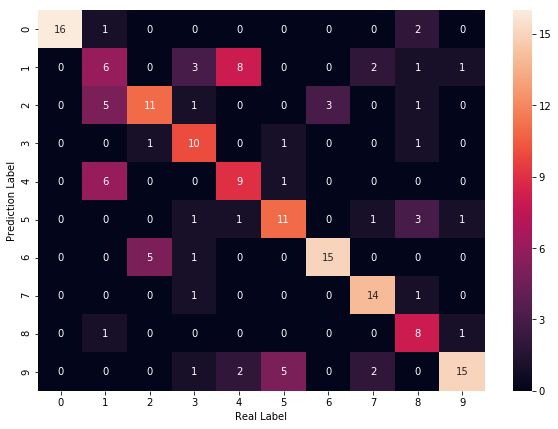

In [11]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [12]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:0 index:[3] real:5
#1 min_error:1 index:[1 3 6] real:2
#2 min_error:0 index:[0] real:8
#3 min_error:0 index:[0] real:0
#4 min_error:0 index:[1] real:1
#5 min_error:0 index:[7] real:7
#6 min_error:0 index:[2] real:6
#7 min_error:0 index:[5] real:3
#8 min_error:0 index:[6] real:2
#9 min_error:0 index:[1] real:1
#10 min_error:0 index:[5] real:7
#11 min_error:0 index:[9] real:4
#12 min_error:0 index:[6] real:6
#13 min_error:1 index:[1 3 6] real:3
#14 min_error:0 index:[1] real:1
#15 min_error:0 index:[9] real:3
#16 min_error:0 index:[9] real:9
#17 min_error:0 index:[1] real:1
#18 min_error:0 index:[9] real:7
#19 min_error:0 index:[6] real:6
#20 min_error:0 index:[8] real:8
#21 min_error:0 index:[1] real:4
#22 min_error:0 index:[3] real:3
#23 min_error:0 index:[1] real:1
#24 min_error:0 index:[1] real:4
#25 min_error:0 index:[0] real:0
#26 min_error:0 index:[5] real:5
#27 min_error:0 index:[3] real:3
#28 min_error:0 index:[6] real:6
#29 min_error:0 index:[1] real:9
#30 min_erro

In [13]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(4):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.6283240568954854
Avg Base Learner:0.8684291898577613


In [14]:
from random import randint

list_acc = []

for iii in range(4):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.12222222222222222
Accuracy on training set: 0.26666666666666666
Accuracy on training set: 0.31666666666666665
Accuracy on training set: 0.49444444444444446


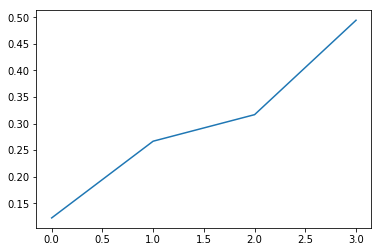

In [15]:
plt.plot(range(4),list_acc)
plt.show()

In [16]:
list_acc

[0.12222222222222222,
 0.26666666666666666,
 0.31666666666666665,
 0.49444444444444446]